<a href="https://colab.research.google.com/github/jlborrego/Employee-Attrition/blob/main/TFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación librerías y dataset

In [ ]:

import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder, scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from collections import Counter
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import plot_tree, export_text
from sklearn.preprocessing import PowerTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix



import warnings

warnings.filterwarnings('ignore')


datos = pd.read_csv("https://raw.githubusercontent.com/jlborrego/Employee-Attrition/main/WA_Fn-UseC_-HR-Employee-Attrition.csv")
pd.set_option('display.max_columns', None) #Para que nos muestre todas las columnas
datos

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [ ]:
datos.head()

df = pd.DataFrame(datos.head())
df.to_latex('datos_head.tex')

# Primer vistazo a los datos

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df = pd.DataFrame(datos.info())
df.to_latex('datos_info.tex')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Podemos ver que no hay valores nulos 👍

In [ ]:
datos.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
df = pd.DataFrame(datos.nunique())
df.to_latex('datos_unicos.tex')

Las columnas de EmployeeCount, EmployeeNumber, Over18, StandardHours no nos aportan ninguna información al tratarse de IDs, conteos o columnas con solo 1 valor único.
Por lo tanto descartamos estos datos.

In [ ]:
datos.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','DailyRate', 'HourlyRate', 'MonthlyRate'],axis="columns", inplace=True)
datos

Age Attrition     BusinessTravel              Department  \
0      41       Yes      Travel_Rarely                   Sales   
1      49        No  Travel_Frequently  Research & Development   
2      37       Yes      Travel_Rarely  Research & Development   
3      33        No  Travel_Frequently  Research & Development   
4      27        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
1465   36        No  Travel_Frequently  Research & Development   
1466   39        No      Travel_Rarely  Research & Development   
1467   27        No      Travel_Rarely  Research & Development   
1468   49        No  Travel_Frequently                   Sales   
1469   34        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  JobInvolvement  JobLevel                    JobRole  \
0     Female               3         2            Sales Executive   
1       Male               2         2         Research Scientist   
2       Male               2         1      Laboratory Technician   
3     Female               3         1         Research Scientist   
4       Male               3         1      Laboratory Technician   
...      ...             ...       ...                        ...   
1465    Male               4         2      Laboratory Technician   
1466    Male               2         3  Healthcare Representative   
1467    Male               4         2     Manufacturing Director   
1468    Male               2         2            Sales Executive   
1469    Male               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  NumCompaniesWorked  \
0                   4        Single           5993                   8   
1                   2       Married           5130                   1   
2                   3        Single           2090                   6   
3                   3       Married           2909                   1   
4                   2       Married           3468                   9   
...               ...           ...            ...                 ...   
1465                4       Married           2571                   4   
1466                1       Married           9991                   4   
1467                2       Married           6142                   1   
1468                2       Married           5390                   2   
1469                3       Married           4404                   2   

     OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0         Yes                 11                  3                         1   
1          No                 23                  4                         4   
2         Yes                 15                  3                         2   
3         Yes                 11                  3                         3   
4          No                 12                  3                         4   
...       ...                ...                ...                       ...   
146

In [ ]:
res_attrition = datos.groupby('Attrition')
res_attrition.mean()

Age  DistanceFromHome  Education  EnvironmentSatisfaction  \
Attrition                                                                    
No         37.561233          8.915653   2.927007                 2.771290   
Yes        33.607595         10.632911   2.839662                 2.464135   

           JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
Attrition                                                             
No               2.770479  2.145985         2.778589    6832.739659   
Yes              2.518987  1.637131         2.468354    4787.092827   

           NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
Attrition                                                             
No                   2.645580          15.231144           3.153285   
Yes                  2.940928          15.097046           3.156118   

           RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
Attrition                                                                  
No                         2.733982          0.845093          11.862936   
Yes                        2.599156          0.527426           8.244726   

           TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
Attrition                                                           
No                      2.832928         2.781022        7.369019   
Yes                     2.624473         2.658228        5.130802   

           YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
Attrition                                                                     
No                   4.484185                 2.234388              4.367397  
Yes                  2.902954                 1.945148              2.852321

No     1233
Yes     237
Name: Attrition, dtype: int64


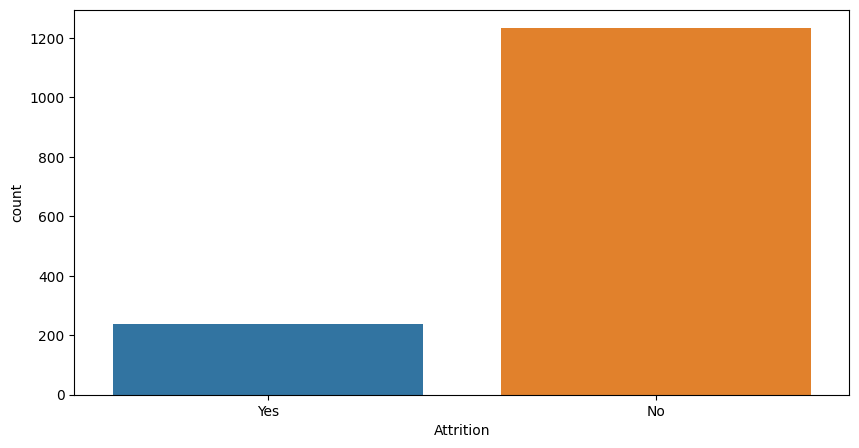

In [ ]:
print(datos['Attrition'].value_counts())
plt.subplots(figsize=(10,5))
sns.countplot(data=datos, x='Attrition')
plt.show()


 1233 (84% de los casos) empleados no abandonaron la organización, mientras que 237 (16% de los casos) sí lo hicieron

In [ ]:
cat_vars = [var for var in datos.columns if datos[var].dtype == 'O']
print('Num de var categóricas:')
print(len(cat_vars))
num_vars = [var for var in datos.columns if var not in cat_vars ]
print('Num de var numéricas:')
print(len(num_vars))


Num de var categóricas:
8
Num de var numéricas:
20


In [ ]:
datos[cat_vars]

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus OverTime  
0     Female            Sales Executive        Single      Yes  
1       Male         Research Scientist       Married       No  
2       Male      Laboratory Technician        Single      Yes  
3     Female         Research Scientist       Married      Yes  
4       Male      Laboratory Technician       Married       No  
...      ...                        ...           ...      ...  
1465    Male      Laboratory Technician       Married       No  
1466    Male  Healthcare Representative       Married       No  
1467    Male     Manufacturing Director       Married      Yes  
1468    Male            Sales Executive       Married       No  
1469    Male      Laboratory Technician       Married       No  

[1470 rows x 8 columns]

In [ ]:
datos[num_vars]

Age  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41                 1          2                        2   
1      49                 8          1                        3   
2      37                 2          2                        4   
3      33                 3          4                        4   
4      27                 2          1                        1   
...   ...               ...        ...                      ...   
1465   36                23          2                        3   
1466   39                 6          1                        4   
1467   27                 4          3                        2   
1468   49                 2          3                        4   
1469   34                 8          3                        2   

      JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0                  3         2                4           5993   
1                  2         2                2           5130   
2                  2         1                3           2090   
3                  3         1                3           2909   
4                  3         1                2           3468   
...              ...       ...              ...            ...   
1465               4         2                4           2571   
1466               2         3                1           9991   
1467               4         2                2           6142   
1468               2         2                2           5390   
1469               4         2                3           4404   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                      8                 11                  3   
1                      1                 23                  4   
2                      6                 15                  3   
3                      1                 11                  3   
4                      9                 12                  3   
...                  ...                ...                ...   
1465                   4                 17                  3   
1466                   4                 15                  3   
1467                   1                 20                  4   
1468                   2                 14                  3   
1469                   2                 12                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1               6   
1                         3                3              10   
2                         3                3               0   
3                         3                3               8   
4                         3                3               2   
...                     ...              ...             ...   
1465                      3                3               5   
1466                      5                3               7   
1467                      0                3               6   
1468                      3                2               9   
1469                      3                4              

# Resumen de datos

En un primer vistazo hemos podido ver varias cosas:

*   Estructura del conjunto de datos: 1470 observaciones (filas), 35 características (variables)

*   Datos que faltan: Por suerte no faltan datos, lo que facilitará el trabajo con el conjunto de datos.

*   Tipos de datos: En este conjunto de datos sólo tenemos dos tipos de datos: 8 categóricos y 23 enteros.

*   Target: 'Attrition' es el objetivo de nuestro conjunto de datos.

*   Conjunto de datos desbalanceado: 1237 (84% de los casos) empleados no abandonaron la organización, mientras que 237 (16% de los casos) sí lo hicieron, lo que hace que nuestro conjunto de datos se considere desequilibrado, ya que hay más personas que permanecen en la organización de las que realmente la abandonan.







# Gráficas generales

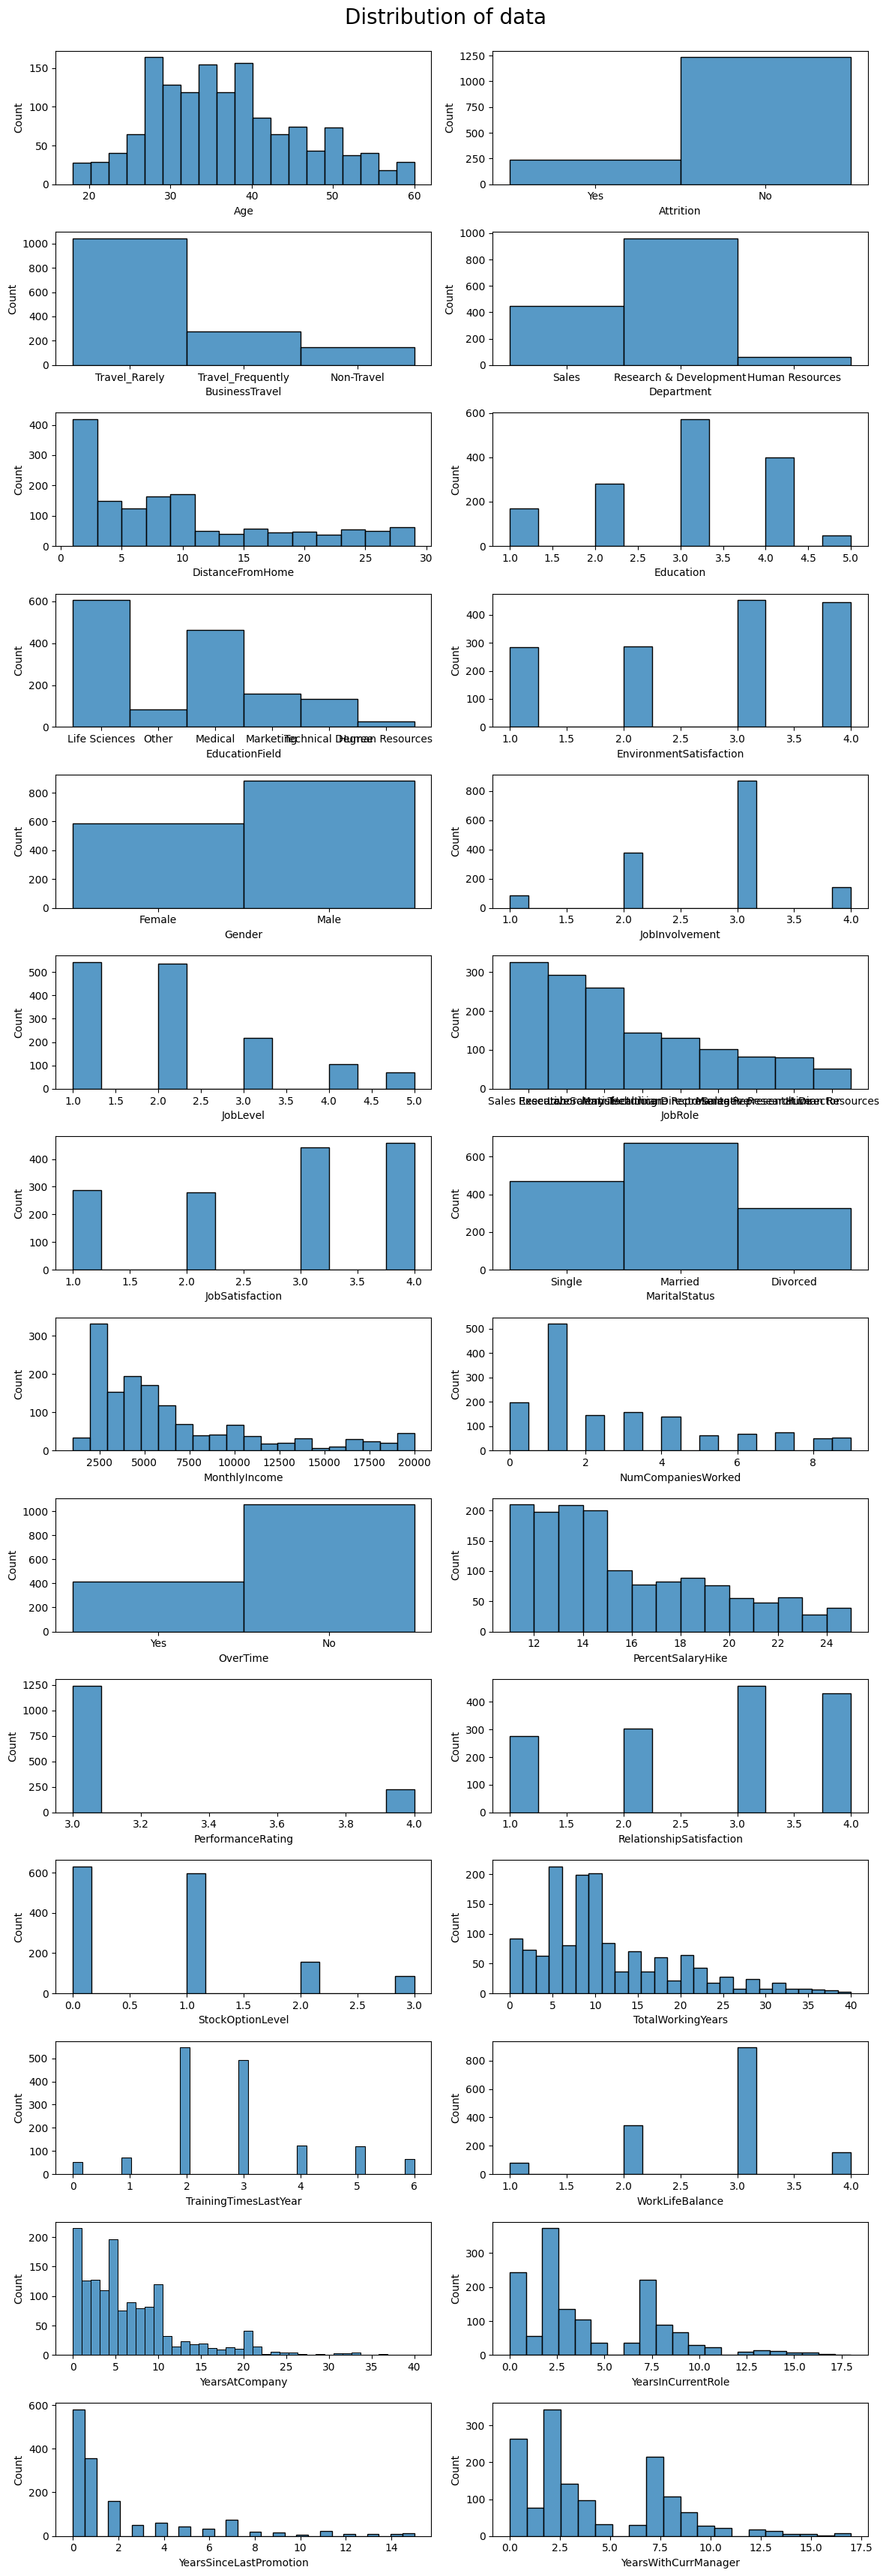

In [ ]:
ncols = 2
nrows = np.ceil(len(datos.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(datos.columns, axs.flatten()):
    sns.histplot(datos, x=c, ax=ax)
fig.suptitle('Distribution of data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('gráfica_OverView.pdf', dpi=fig.dpi)

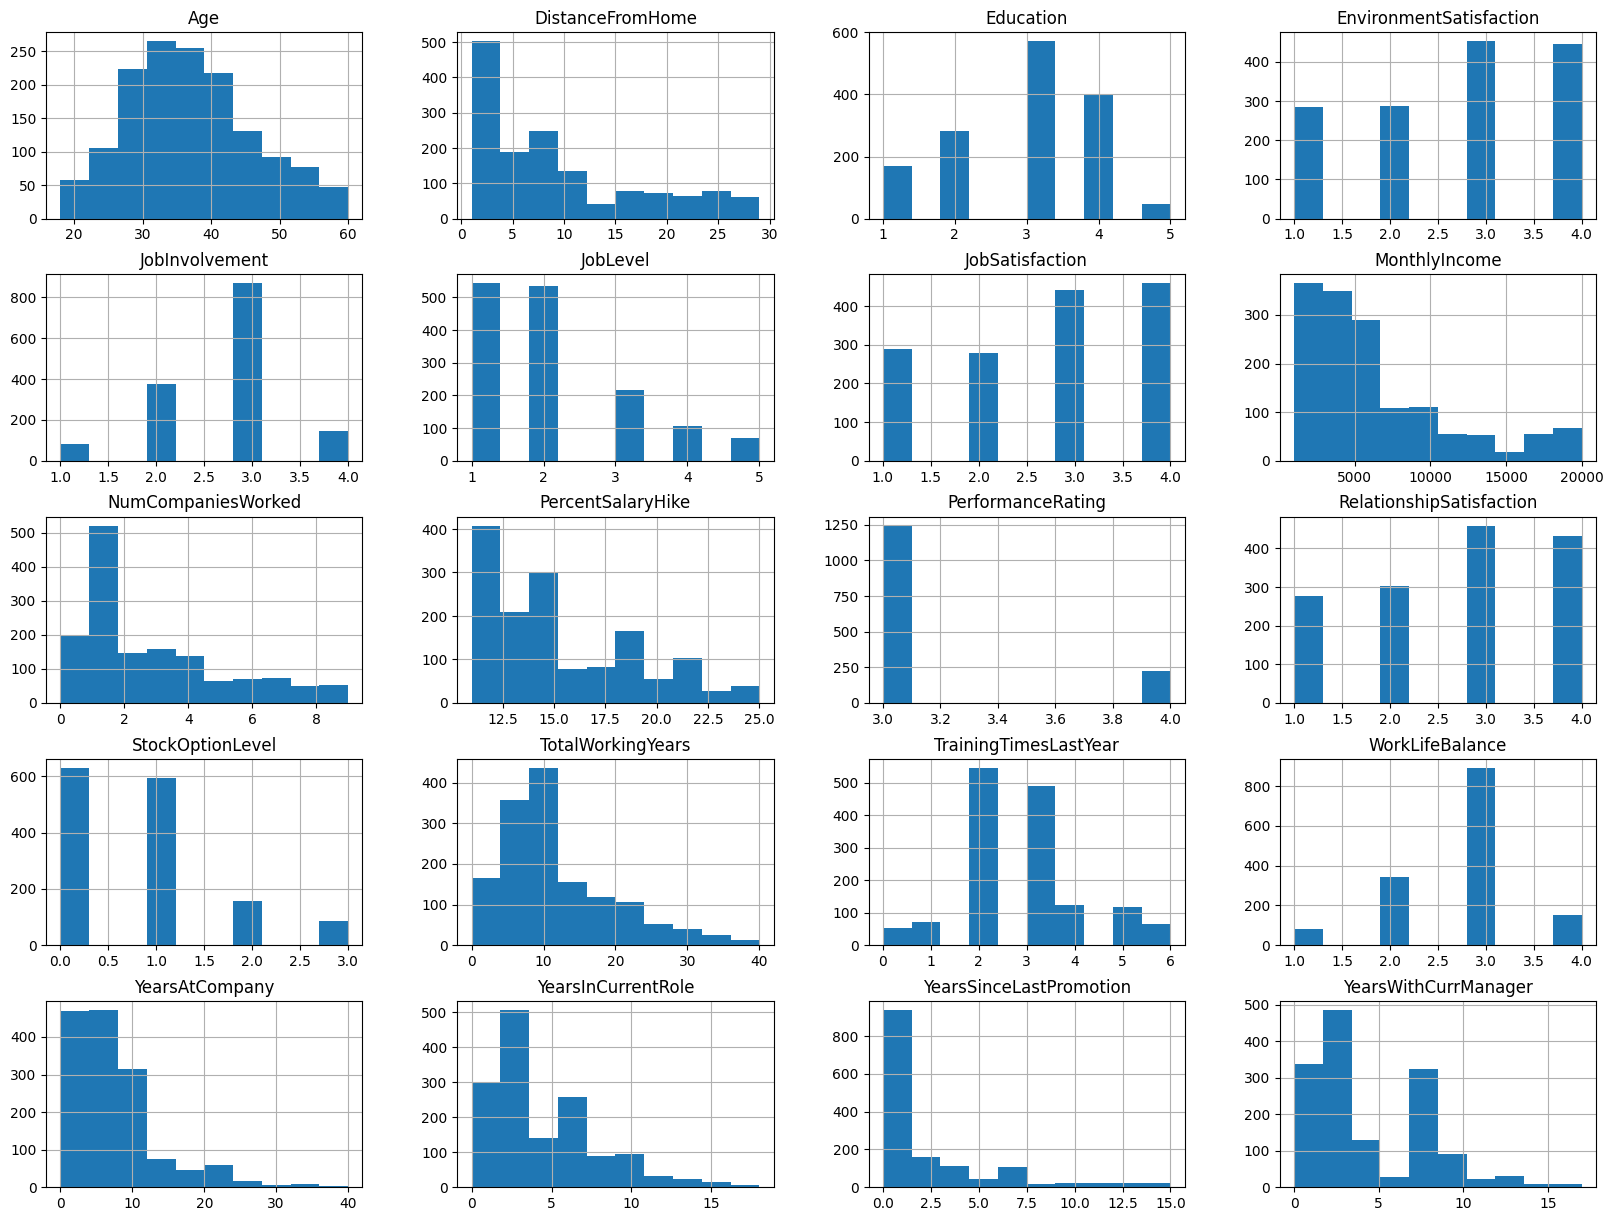

In [ ]:
datos.hist(figsize=(20,15))
plt.show() 


# Gráficas de varibles Catégoricas

## Género (Gender)

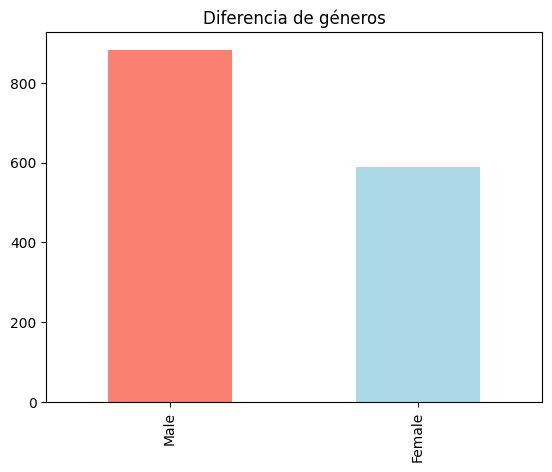

In [ ]:
datos['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Diferencia de géneros")
plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

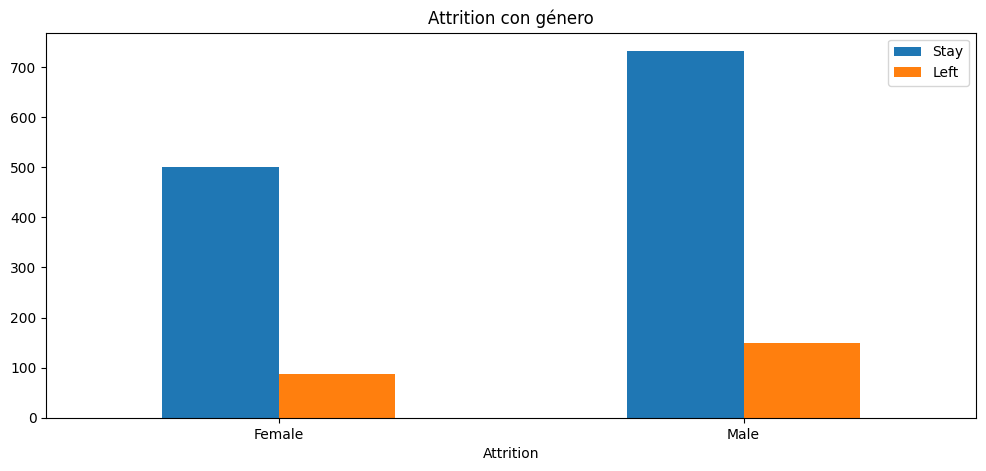

In [ ]:
pd.crosstab(datos['Gender'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con género")
plt.xlabel("Attrition")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

## Horas extra (Overtime)

<Axes: title={'center': 'Horas extra'}>

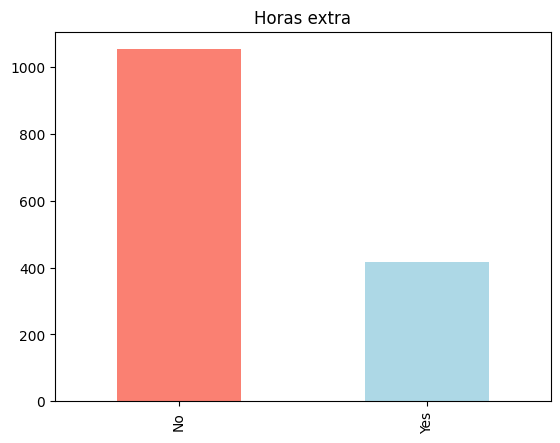

In [ ]:
datos['OverTime'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Horas extra")

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

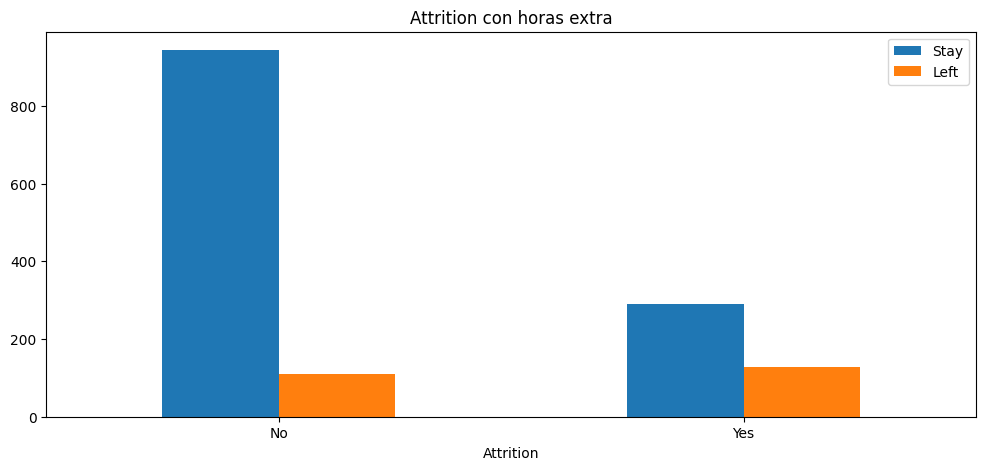

In [ ]:
pd.crosstab(datos['OverTime'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con horas extra")
plt.xlabel("Attrition")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

## Viajar (BusinessTravel)

In [ ]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

(array([0, 1, 2]),
 [Text(0, 0, 'Travel_Rarely'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Non-Travel')])

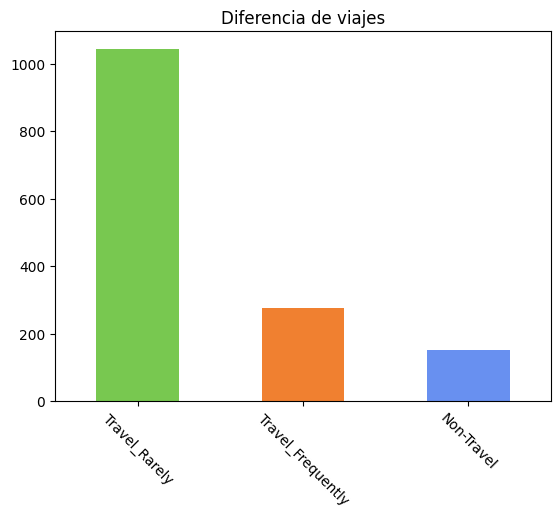

In [ ]:
datos['BusinessTravel'].value_counts().plot(kind='bar',color=color_types,title="Diferencia de viajes")
plt.xticks(rotation=-45)

(array([0, 1, 2]),
 [Text(0, 0, 'Non-Travel'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Travel_Rarely')])

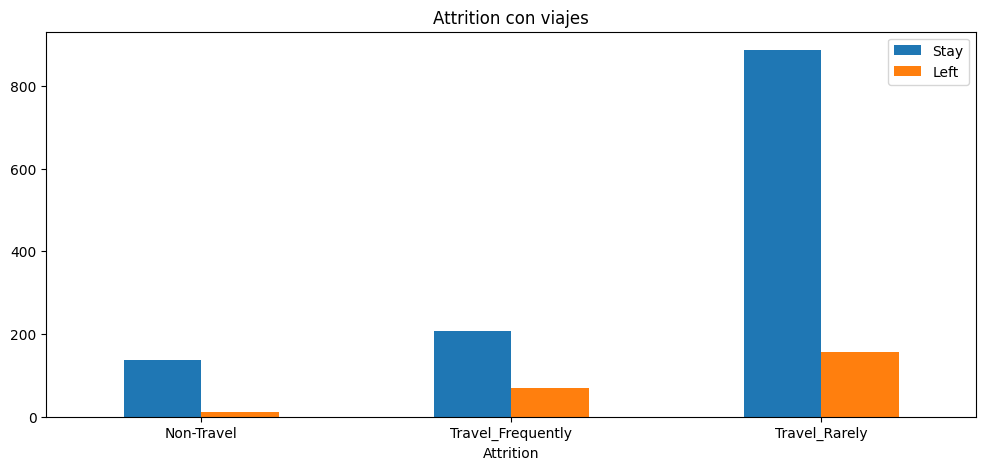

In [ ]:
pd.crosstab(datos['BusinessTravel'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con viajes")
plt.xlabel("Attrition")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

## Departamento (Department)

(array([0, 1, 2]),
 [Text(0, 0, 'Research & Development'),
  Text(1, 0, 'Sales'),
  Text(2, 0, 'Human Resources')])

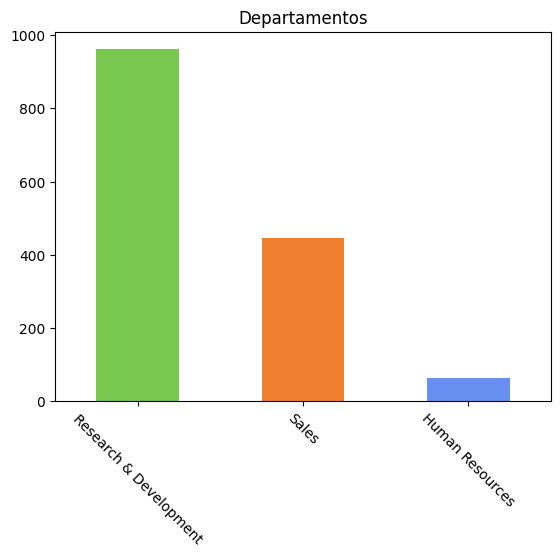

In [ ]:
datos['Department'].value_counts().plot(kind='bar',color=color_types,title="Departamentos")
plt.xticks(rotation=-45)

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

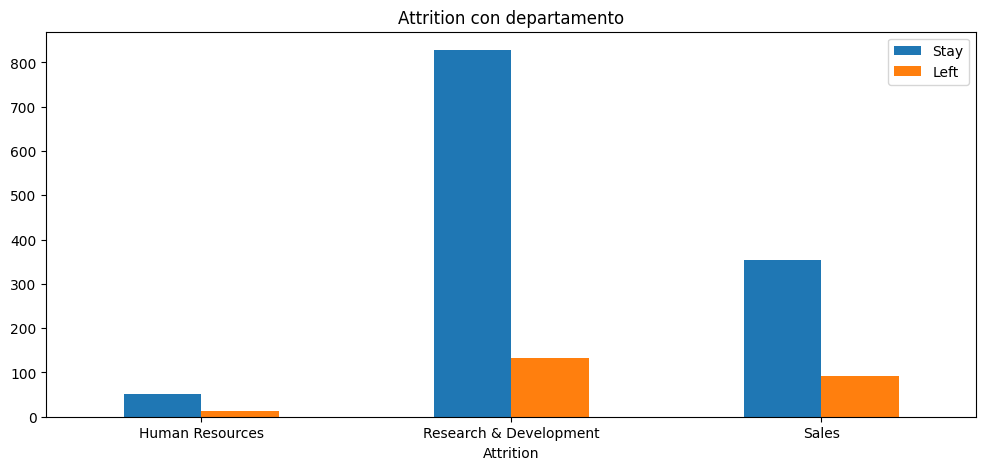

In [ ]:
pd.crosstab(datos['Department'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con departamento")
plt.xlabel("Attrition")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

## 

## Tipo de estudios (EducationField)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Medical'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Technical Degree'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Human Resources')])

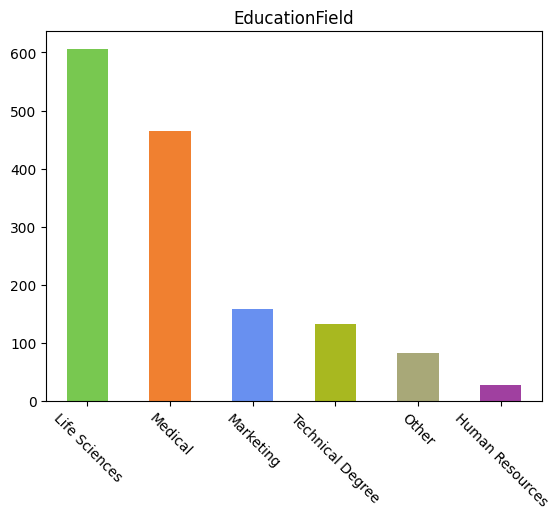

In [ ]:
datos['EducationField'].value_counts().plot(kind='bar',color=color_types,title="EducationField")
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Life Sciences'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Medical'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Technical Degree')])

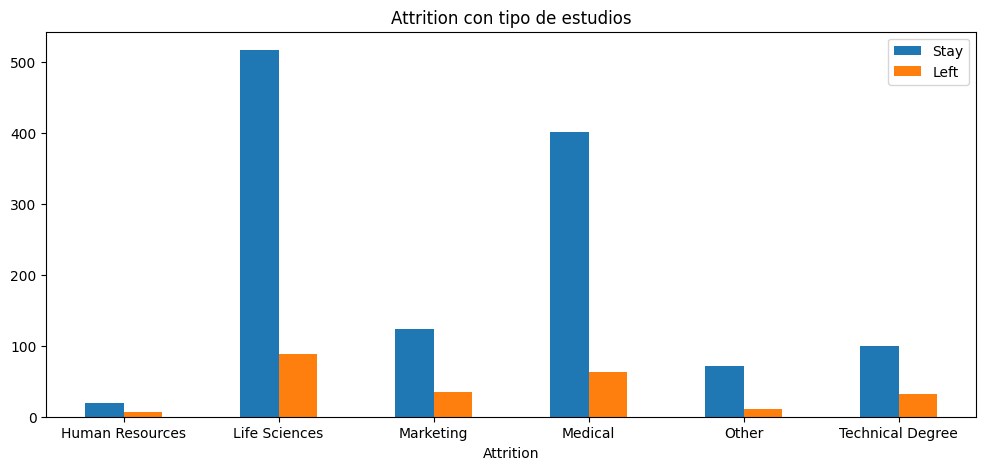

In [ ]:
pd.crosstab(datos['EducationField'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con tipo de estudios")
plt.xlabel("Attrition")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

## Rol de trabajo (JobRole)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

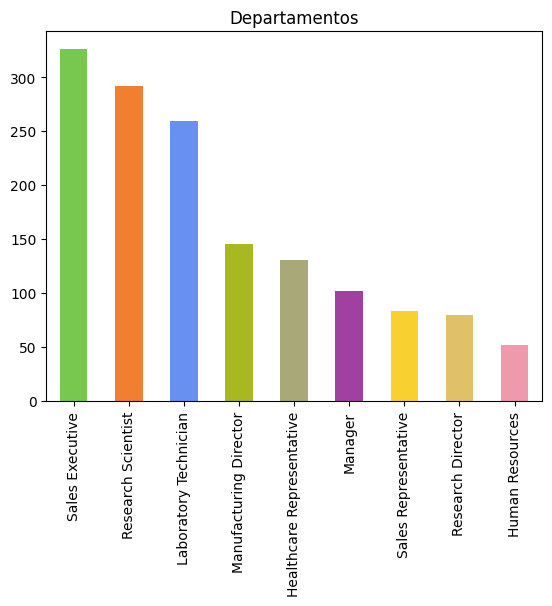

In [ ]:
datos['JobRole'].value_counts().plot(kind='bar',color=color_types,title="Departamentos")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

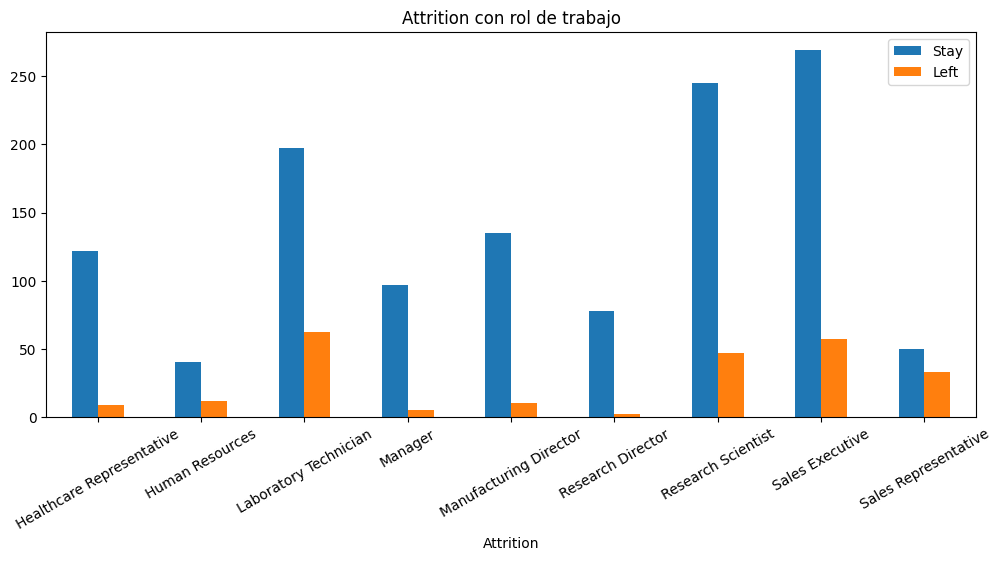

In [ ]:
pd.crosstab(datos['JobRole'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con rol de trabajo")
plt.xlabel("Attrition")
plt.legend(["Stay","Left"])
plt.xticks(rotation=30)


## Estado civil (MaritalStatus)

<Axes: title={'center': 'Departamentos'}>

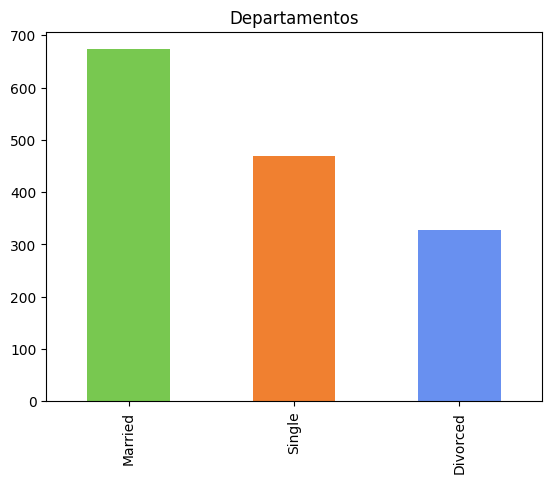

In [ ]:
datos['MaritalStatus'].value_counts().plot(kind='bar',color=color_types ,title="Departamentos")

(array([0, 1, 2]),
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

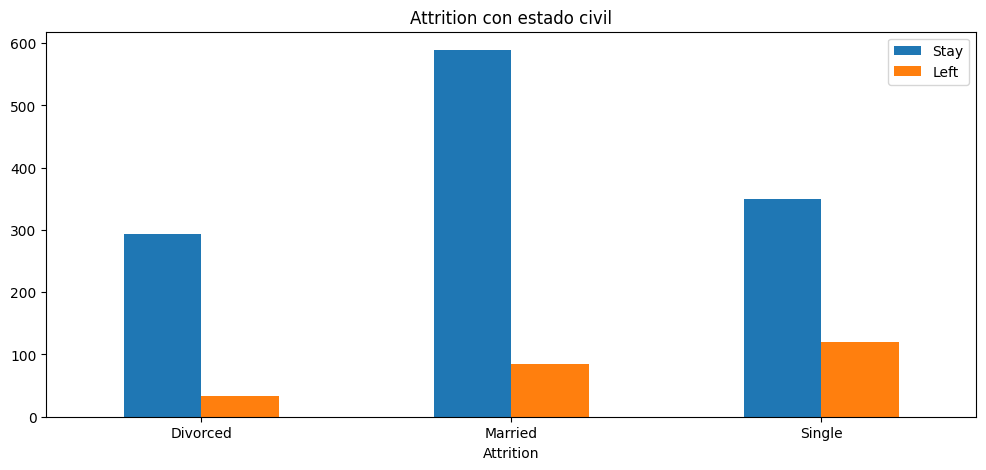

In [ ]:
pd.crosstab(datos['MaritalStatus'],datos['Attrition']).plot(kind="bar",figsize=(12,5))
plt.title("Attrition con estado civil")
plt.xlabel("Attrition")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

# **Gráficas de variables númericas**

## Edad (Age)

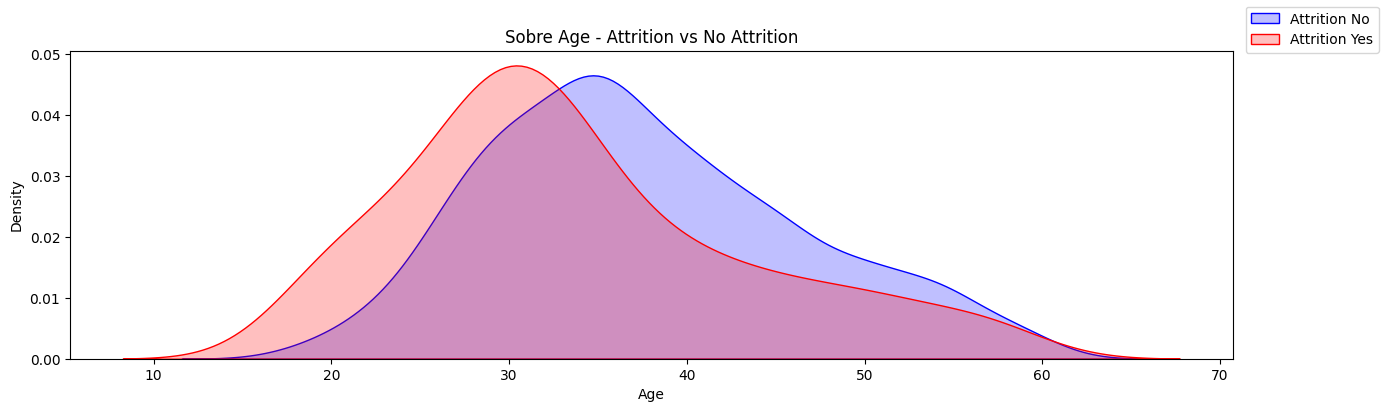

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'Age'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'Age'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre Age - Attrition vs No Attrition')
plt.show()
fig.savefig('gráfica_Age.pdf')
#sns_plot.figure.savefig("output.png")
#plt.savefig('gráfica_Age.pdf')

## Distancia desde casa (DistanceFromHome)

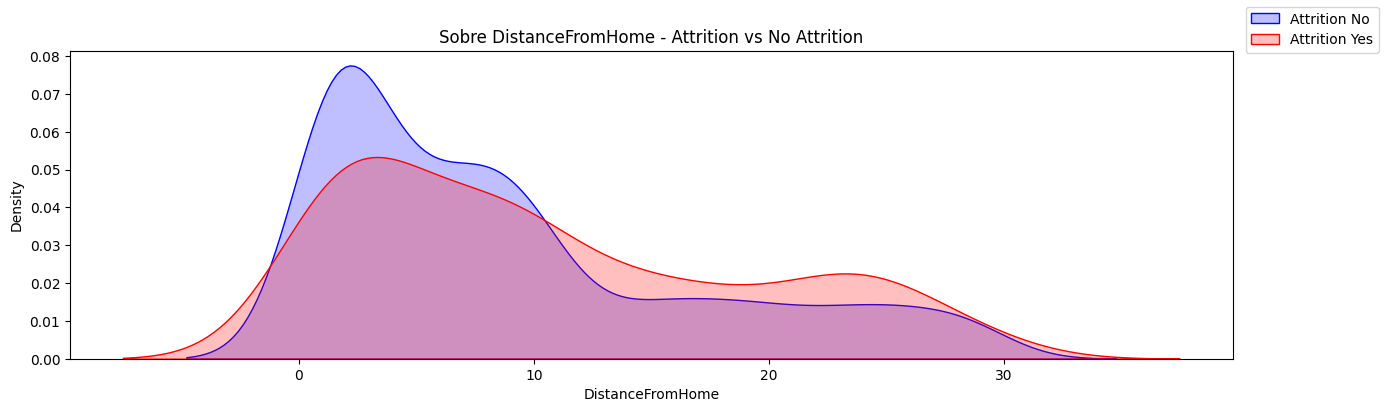

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'DistanceFromHome'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'DistanceFromHome'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre DistanceFromHome - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_DistanceFromHome.pdf', dpi=fig.dpi)

## Educación (Education)

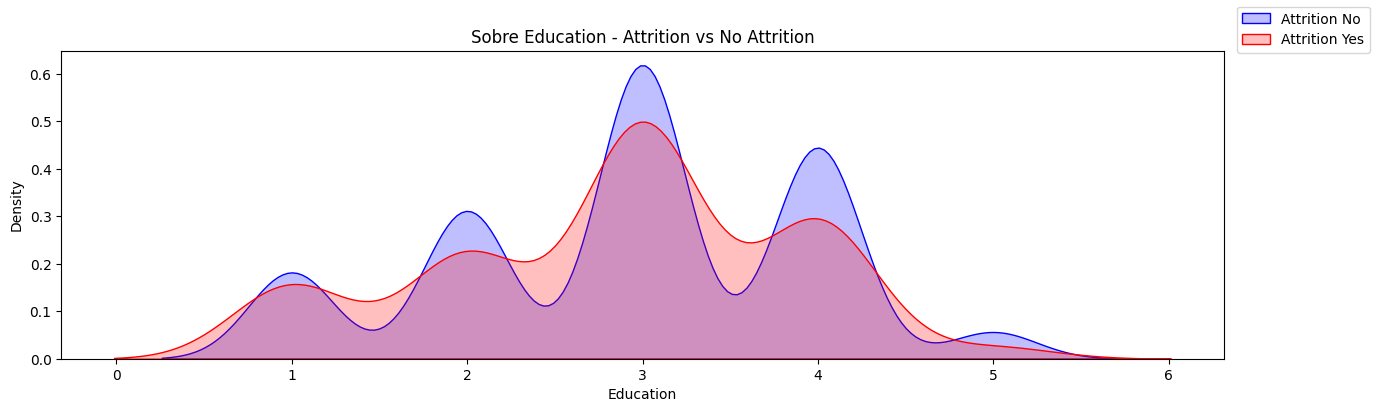

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'Education'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'Education'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre Education - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_Education.pdf', dpi=fig.dpi)

## Satisfacción con el entorno (EnvironmentSatisfaction)

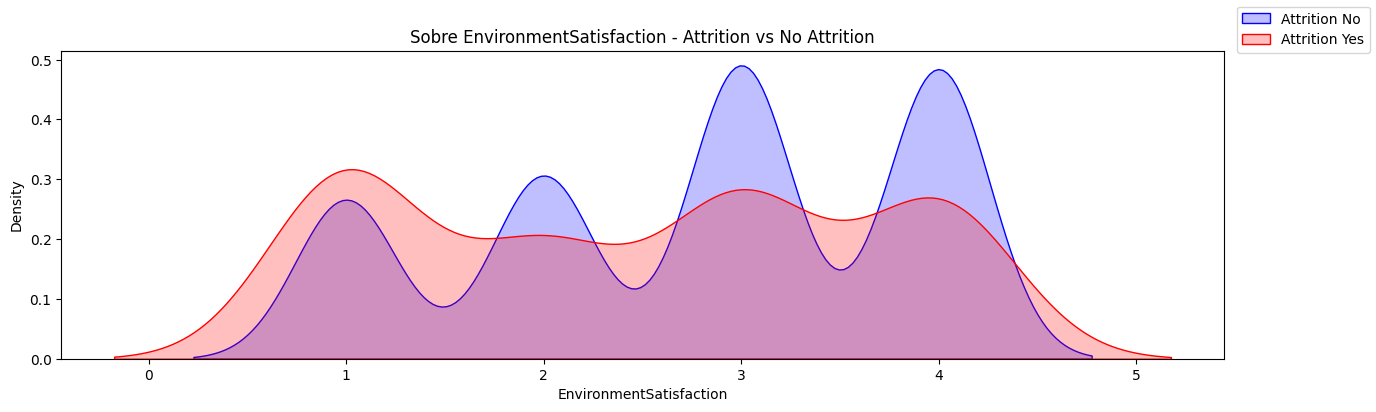

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'EnvironmentSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'EnvironmentSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre EnvironmentSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_EnvironmentSatisfaction.pdf', dpi=fig.dpi)

## Implicación en el trabajo (JobInvolvement)

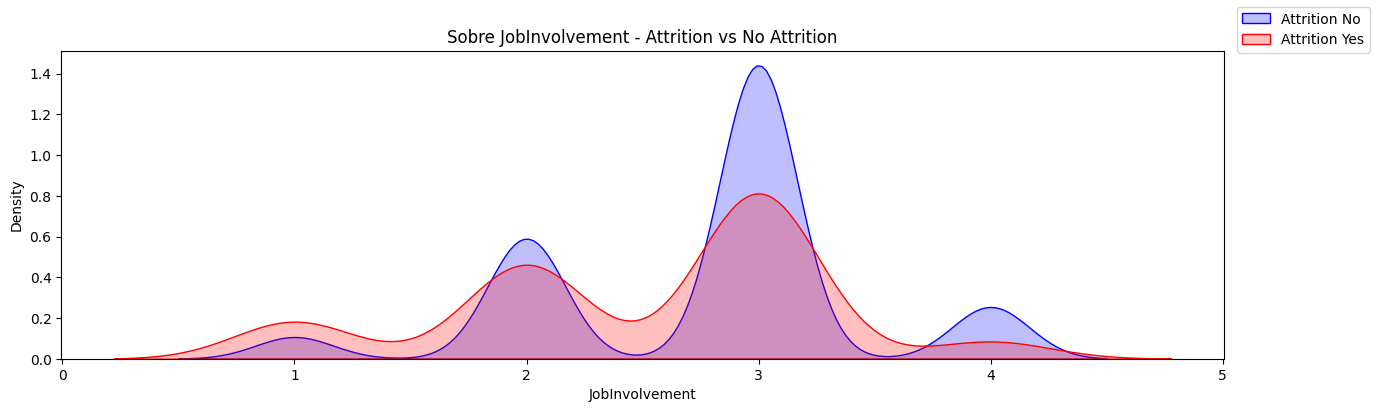

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobInvolvement'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobInvolvement'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobInvolvement - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobInvolvement.pdf', dpi=fig.dpi)

## Nivel de trabajo (JobLevel)

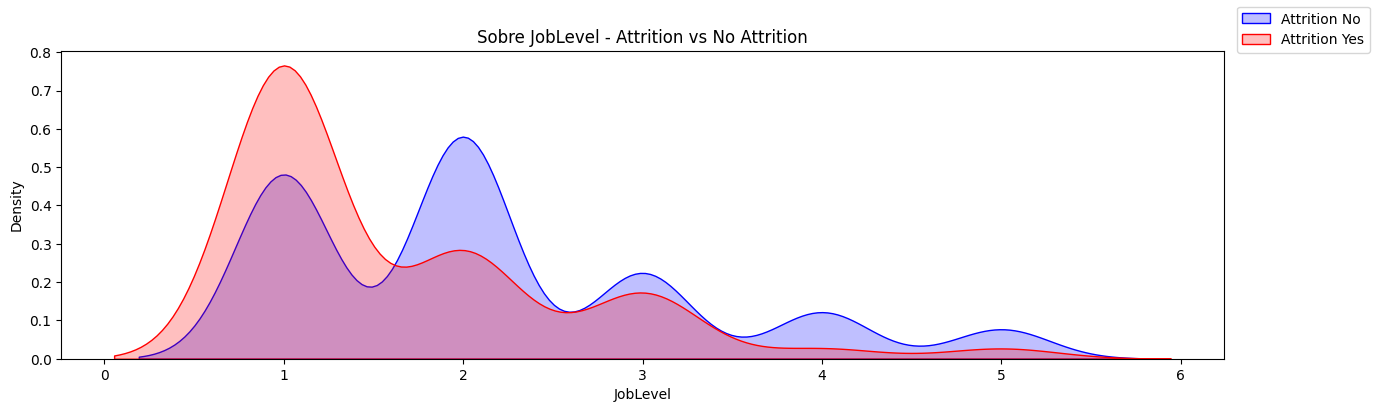

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobLevel'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobLevel'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobLevel - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobLevel.pdf', dpi=fig.dpi)

## Satisfacción con el trabajo (JobSatisfaction)

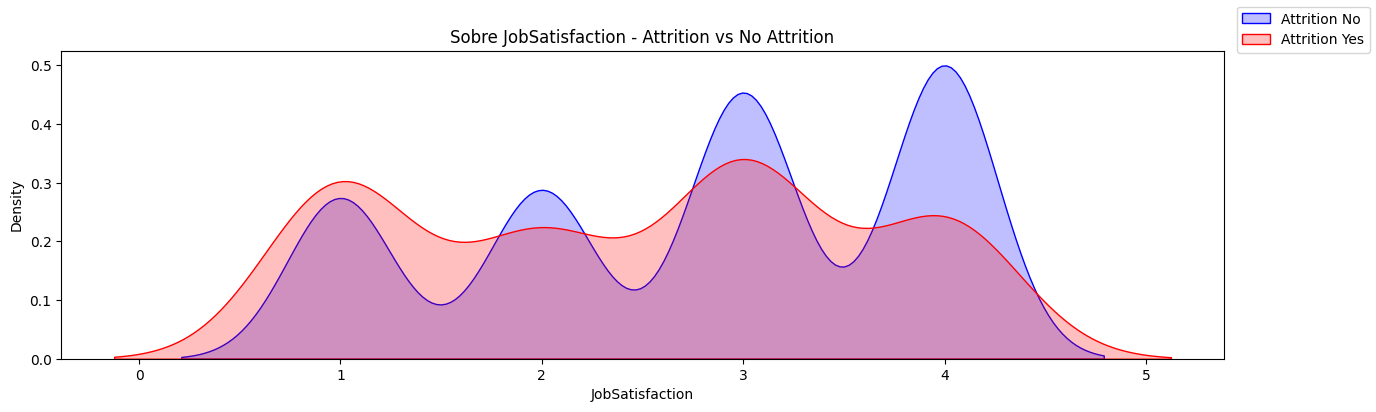

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'JobSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'JobSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre JobSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_JobSatisfaction.pdf', dpi=fig.dpi)

##  Ingreso mensual (MonthlyIncome)

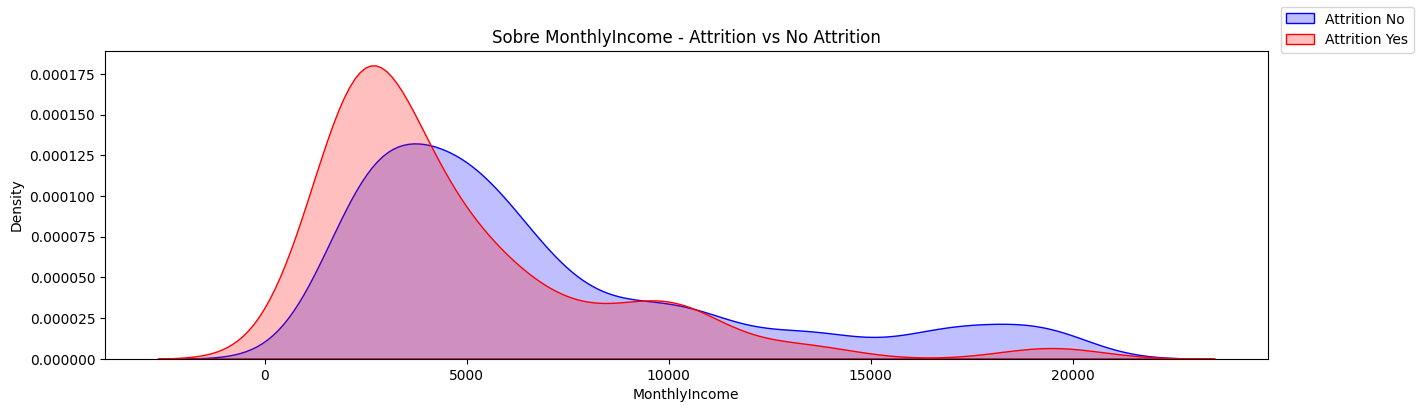

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'MonthlyIncome'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'MonthlyIncome'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre MonthlyIncome - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_MonthlyIncome.pdf', dpi=fig.dpi)

## Número de compañías en las que ha trabajado (NumCompaniesWorked)

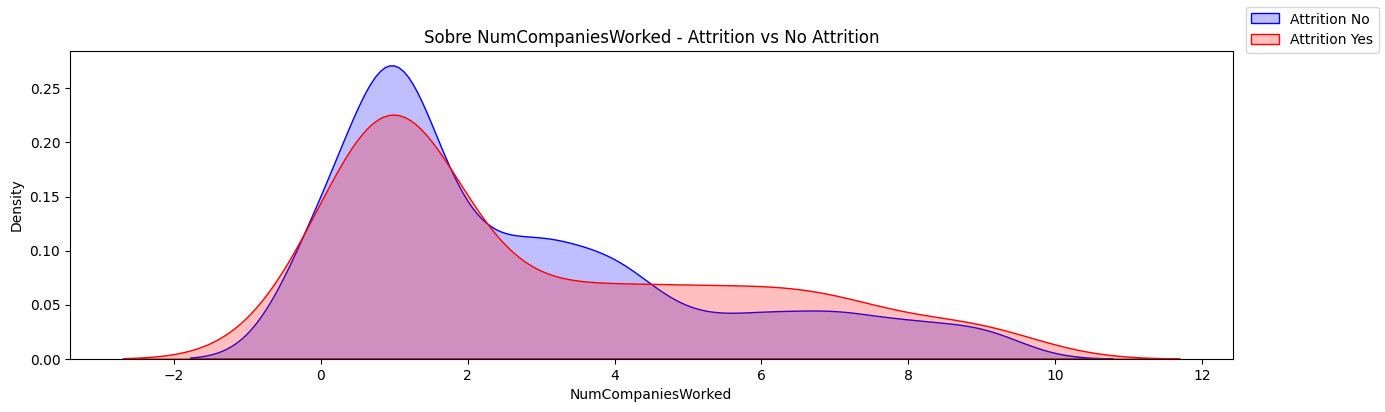

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'NumCompaniesWorked'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'NumCompaniesWorked'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre NumCompaniesWorked - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_NumCompaniesWorked.pdf', dpi=fig.dpi)

## Porcentaje de aumento salarial (PercentSalaryHike)

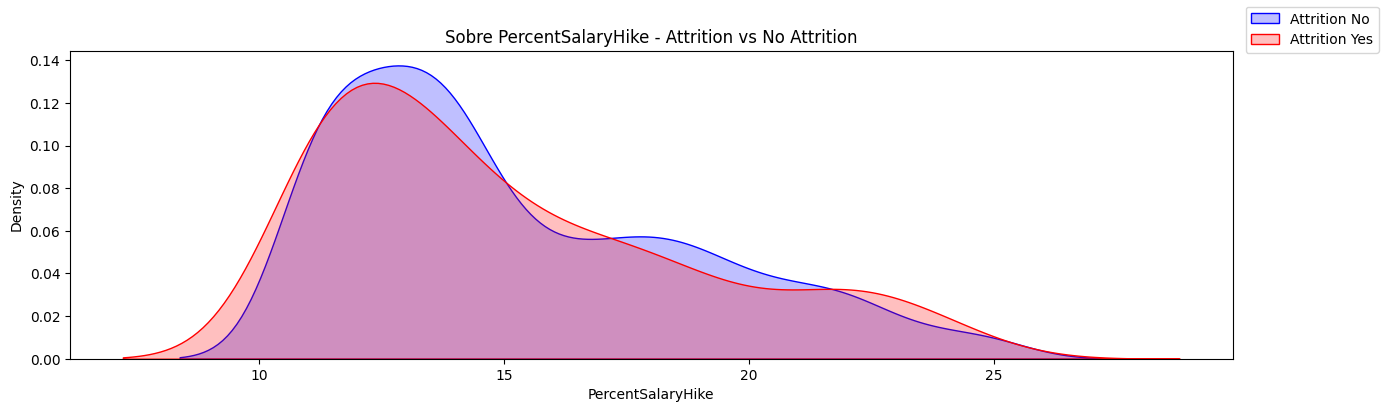

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'PercentSalaryHike'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'PercentSalaryHike'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre PercentSalaryHike - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_PercentSalaryHike.pdf', dpi=fig.dpi)

## Calificación de desempeño del empleado (PerformanceRating)

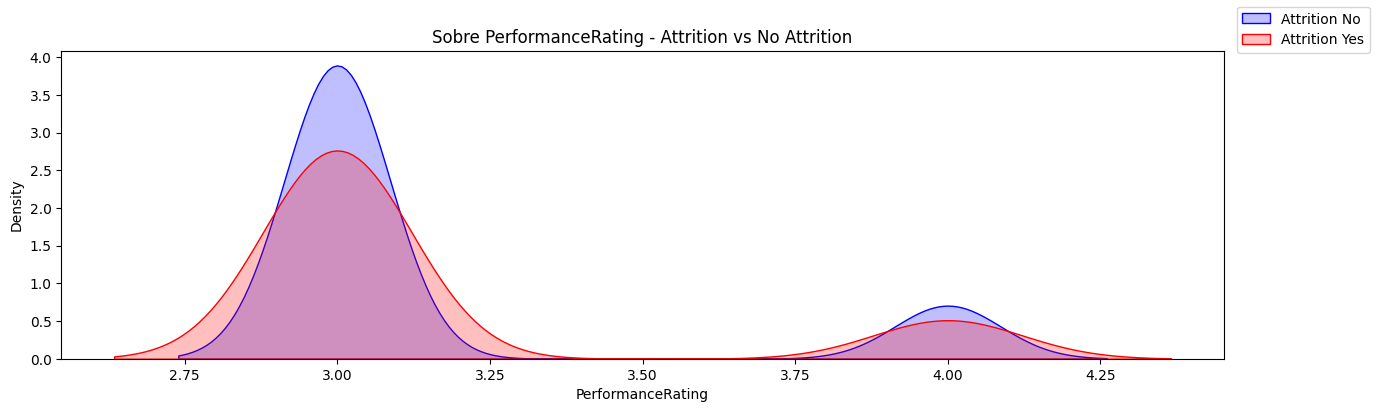

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'PerformanceRating'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'PerformanceRating'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre PerformanceRating - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_PerformanceRating.pdf', dpi=fig.dpi)

## Satisfacción de la relación (RelationshipSatisfaction)

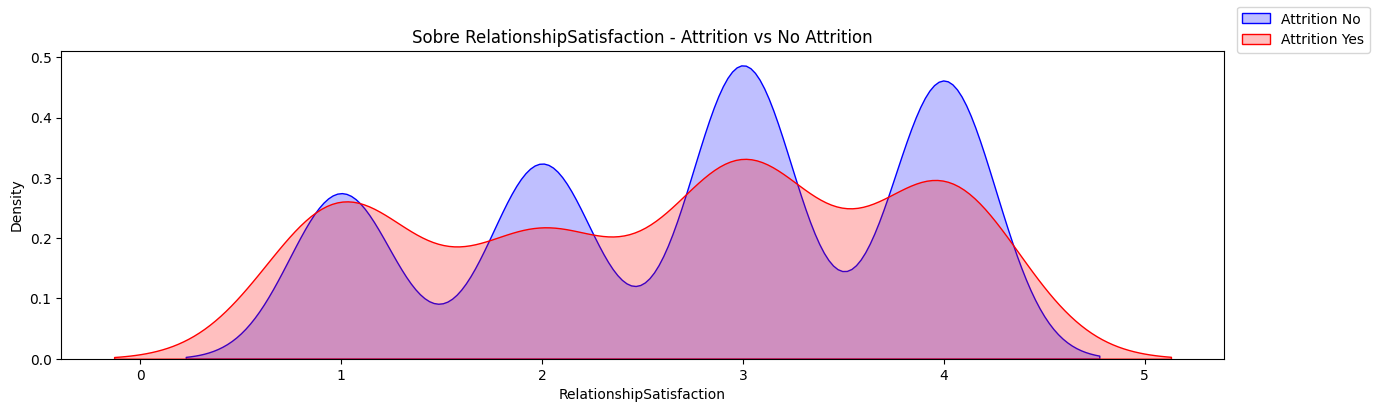

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'RelationshipSatisfaction'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'RelationshipSatisfaction'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre RelationshipSatisfaction - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_RelationshipSatisfaction.pdf', dpi=fig.dpi)

## Nivel de opciones sobre acciones que se han otorgado al empleado(StockOptionLevel)

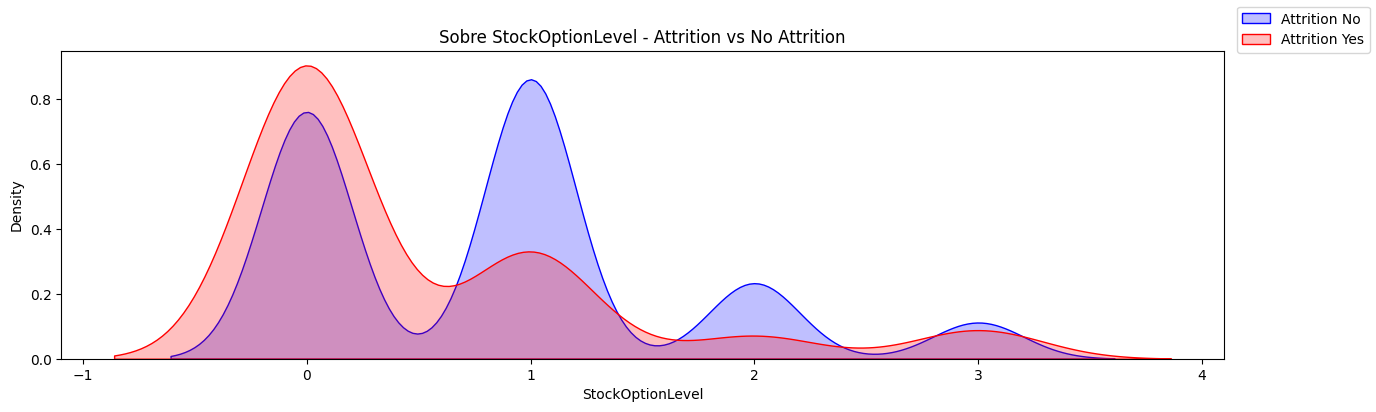

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'StockOptionLevel'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'StockOptionLevel'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre StockOptionLevel - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_StockOptionLevel.pdf', dpi=fig.dpi)

## Número total de años trabajados (TotalWorkingYears)

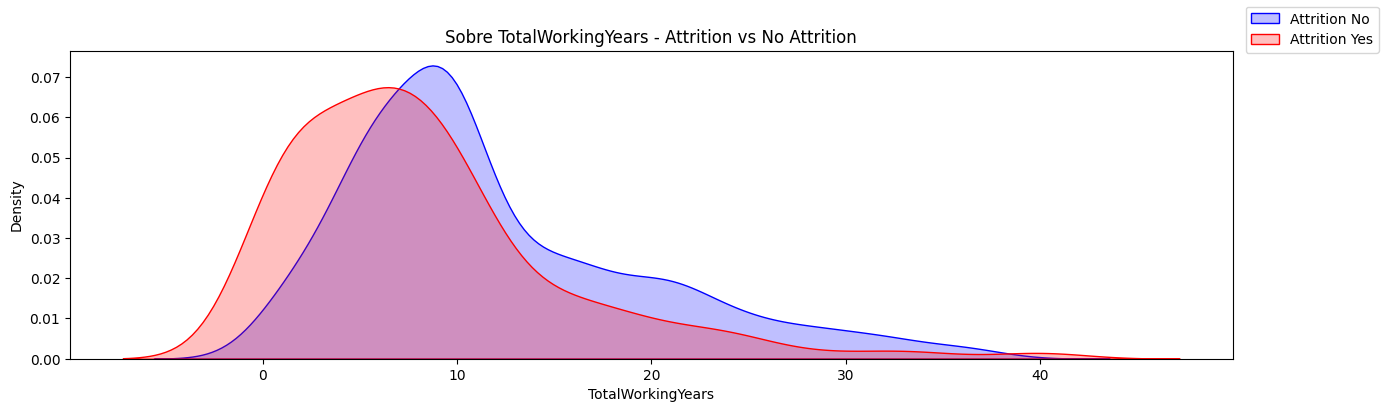

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'TotalWorkingYears'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'TotalWorkingYears'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre TotalWorkingYears - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_TotalWorkingYears.pdf', dpi=fig.dpi)

## Número de veces que el empleado ha recibido formación en el último año(TrainingTimesLastYear)

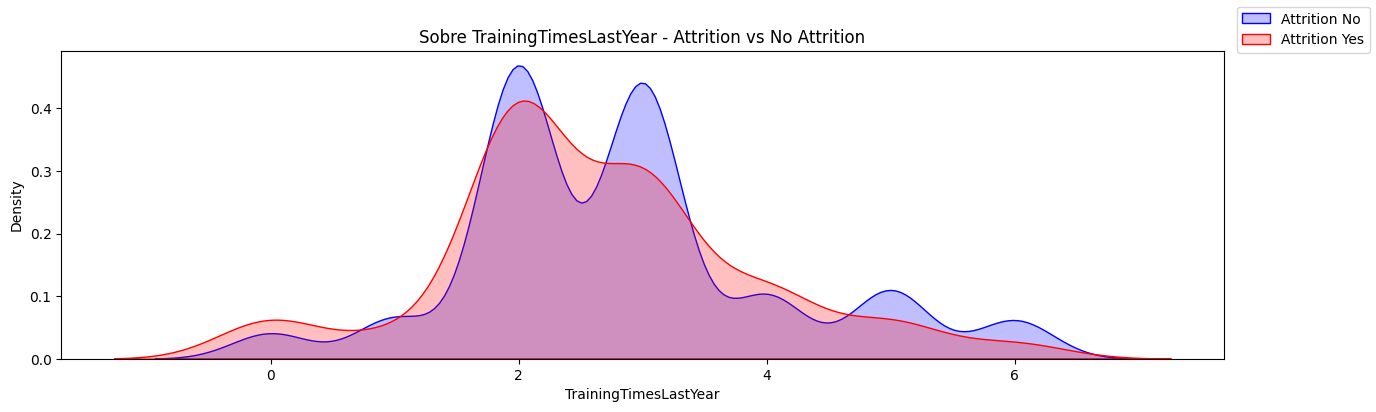

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'TrainingTimesLastYear'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'TrainingTimesLastYear'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre TrainingTimesLastYear - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_TrainingTimesLastYear.pdf', dpi=fig.dpi)

## Equilibrio entre trabajo y vida personal (WorkLifeBalance)

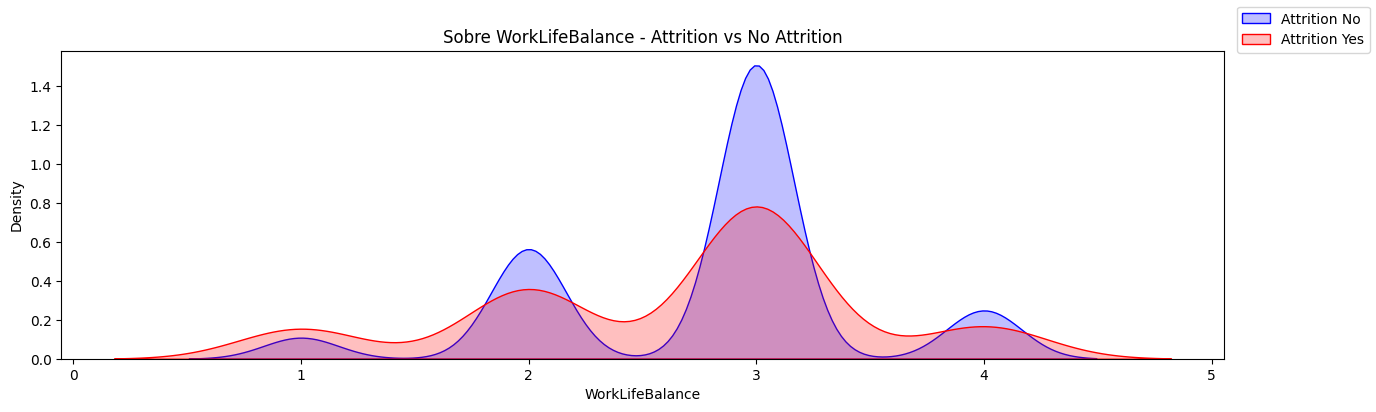

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'WorkLifeBalance'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'WorkLifeBalance'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre WorkLifeBalance - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_WorkLifeBalance.pdf', dpi=fig.dpi)

## Años en la compañía (YearsAtCompany)

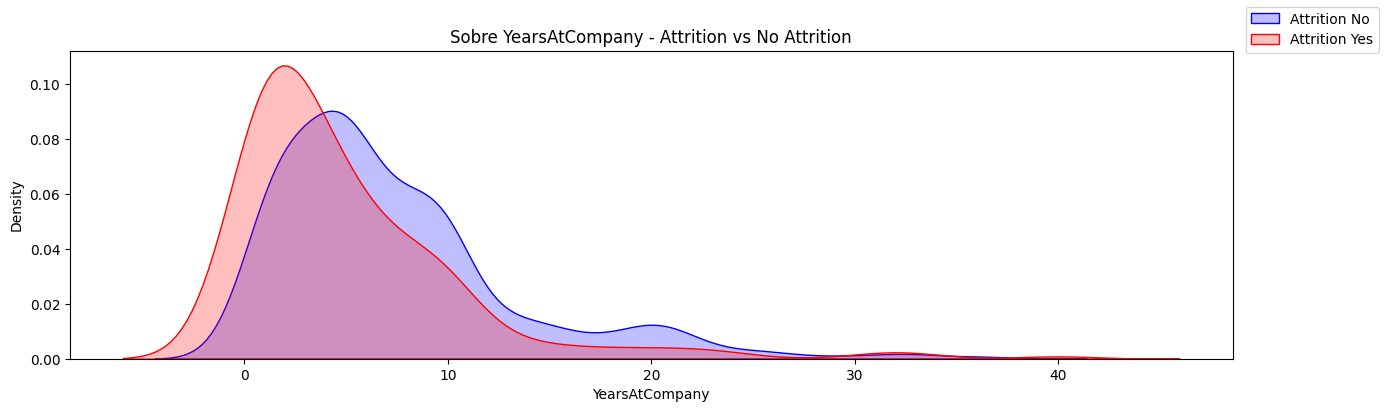

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsAtCompany'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsAtCompany'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsAtCompany - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsAtCompany.pdf', dpi=fig.dpi)

## Años en rol actual (YearsInCurrentRole)

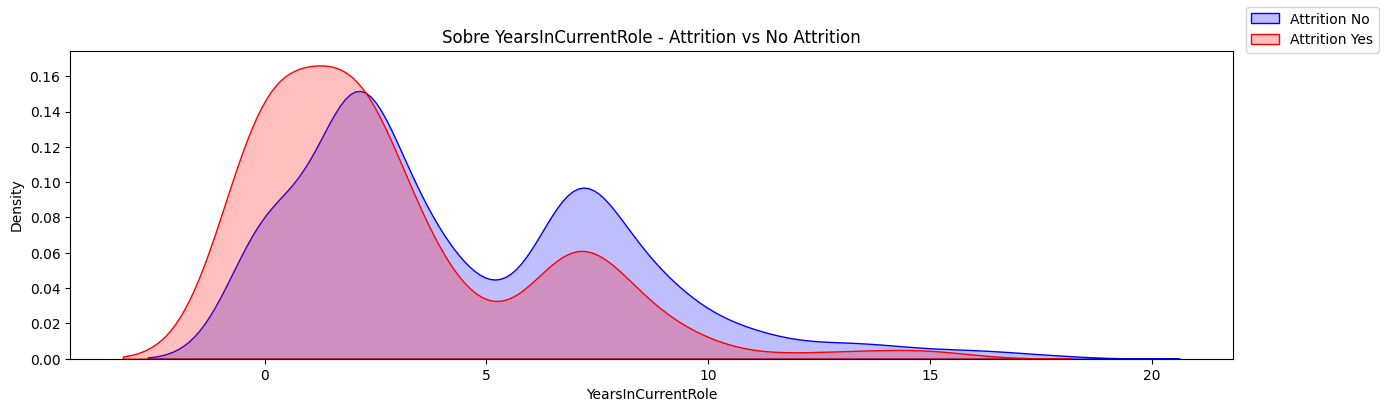

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsInCurrentRole'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsInCurrentRole'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsInCurrentRole - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsInCurrentRole.pdf', dpi=fig.dpi)

## Años desde el último ascenso (YearsSinceLastPromotion)

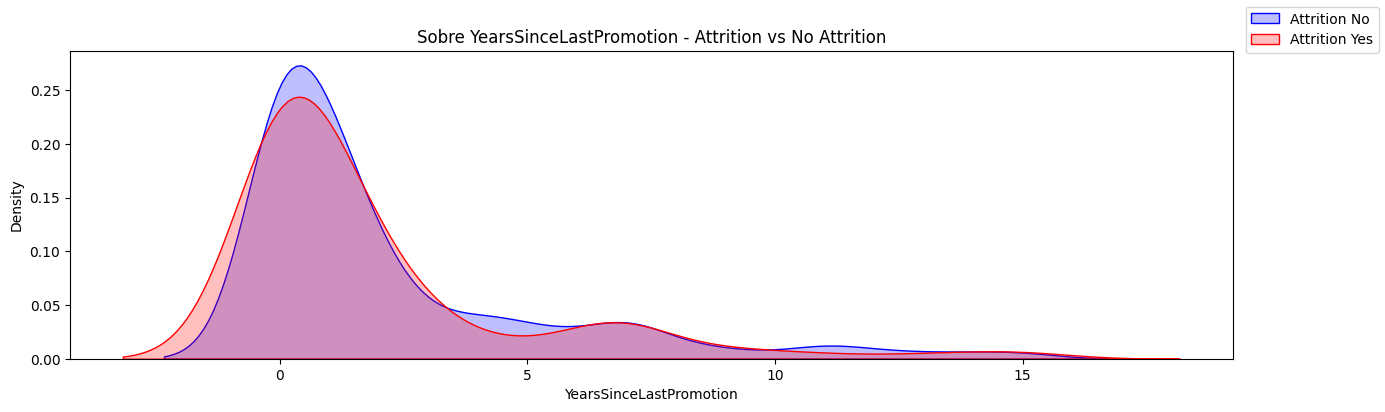

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsSinceLastPromotion'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsSinceLastPromotion'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsSinceLastPromotion - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsSinceLastPromotion.pdf', dpi=fig.dpi)

## Años con el actual jefe (YearsWithCurrManager)

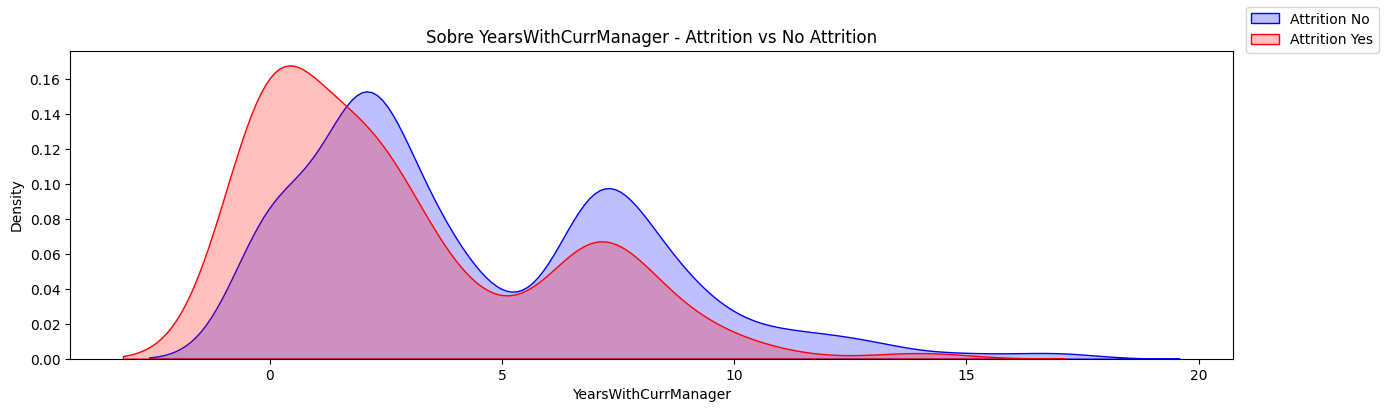

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(15,4))

ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'No'),'YearsWithCurrManager'] , color='b',fill=True,label='no Attrition')
ax=sns.kdeplot(datos.loc[(datos['Attrition'] == 'Yes'),'YearsWithCurrManager'] , color='r',fill=True, label='Attrition')

fig.legend(labels=['Attrition No', 'Attrition Yes'])
plt.title('Sobre YearsWithCurrManager - Attrition vs No Attrition')
plt.show()
plt.savefig('gráfica_YearsWithCurrManager.pdf', dpi=fig.dpi)

# Preprocesamiento de datos

# Mapa de correlación

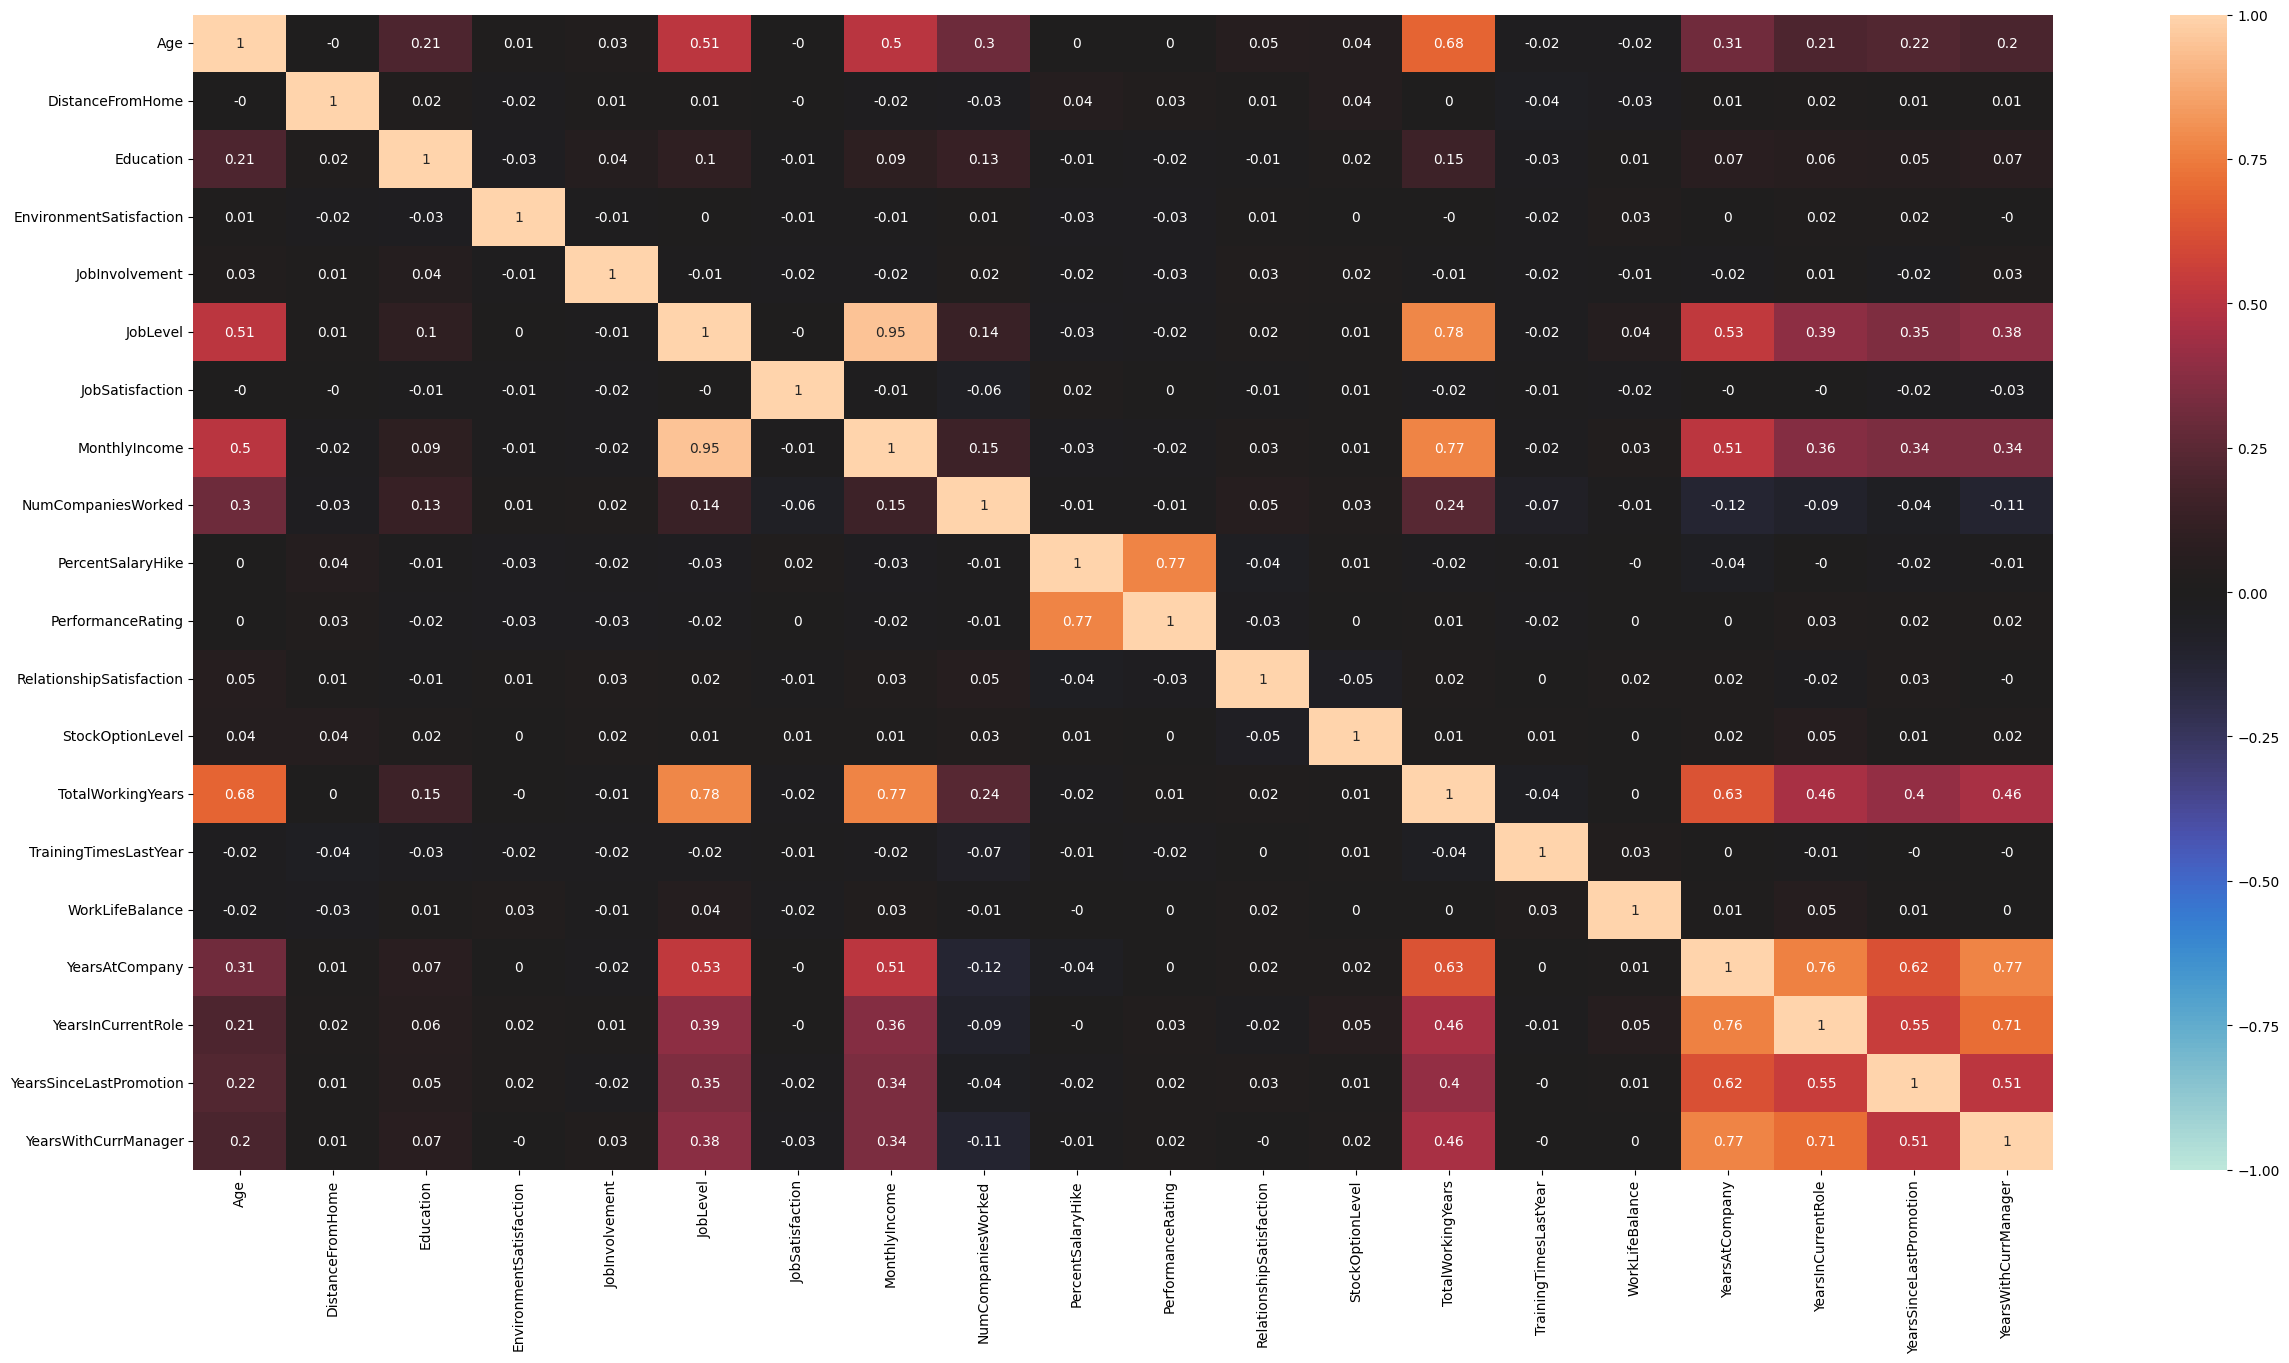

In [ ]:
fig = plt.figure(figsize=(30,15))
corr = datos.corr()
sns.heatmap(round(corr,2), vmin=-1, center=0, vmax=1, annot=True);
plt.savefig('temp.pdf', dpi=fig.dpi)

[texto del enlace](https://)Podríamos considerar tratar las varibales de YearsAtCompany, YearsWithCurrentCrole.. ya que podemos observar que tienen una cierta correlación directa.

In [ ]:
threshold=0.7
cols=list(corr.columns)
cols_at_index=list(corr.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(corr)):
        if corr[cols[i]][j]>=threshold and corr[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(corr[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

feature1              feature2  correlation
0            JobLevel         MonthlyIncome     0.950300
1            JobLevel     TotalWorkingYears     0.782208
2       MonthlyIncome     TotalWorkingYears     0.772893
3   PercentSalaryHike     PerformanceRating     0.773550
4      YearsAtCompany    YearsInCurrentRole     0.758754
5      YearsAtCompany  YearsWithCurrManager     0.769212
6  YearsInCurrentRole  YearsWithCurrManager     0.714365

TotalWorkingYears, JobLevel and MonthlyIncome: Tienen un valor de correlación muy alto. Opte por mantener MonthlyIncome.

PercentSalaryHike and PerformanceRating: Tienen un valor de correlación de 0,77. Opte por mantener PerformanceRating.

YearsAtCompany, YearsInCurrentRole, and YearsWithCurrManager: Tienen un valor de correlación alto. Decida mantener YearsAtCompany.



In [ ]:
datos.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager'],axis=1,inplace=True)

In [ ]:
datos

Age Attrition     BusinessTravel              Department  \
0      41       Yes      Travel_Rarely                   Sales   
1      49        No  Travel_Frequently  Research & Development   
2      37       Yes      Travel_Rarely  Research & Development   
3      33        No  Travel_Frequently  Research & Development   
4      27        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
1465   36        No  Travel_Frequently  Research & Development   
1466   39        No      Travel_Rarely  Research & Development   
1467   27        No      Travel_Rarely  Research & Development   
1468   49        No  Travel_Frequently                   Sales   
1469   34        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  JobInvolvement                    JobRole  JobSatisfaction  \
0     Female               3            Sales Executive                4   
1       Male               2         Research Scientist                2   
2       Male               2      Laboratory Technician                3   
3     Female               3         Research Scientist                3   
4       Male               3      Laboratory Technician                2   
...      ...             ...                        ...              ...   
1465    Male               4      Laboratory Technician                4   
1466    Male               2  Healthcare Representative                1   
1467    Male               4     Manufacturing Director                2   
1468    Male               2            Sales Executive                2   
1469    Male               4      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  NumCompaniesWorked OverTime  \
0           Single           5993                   8      Yes   
1          Married           5130                   1       No   
2           Single           2090                   6      Yes   
3          Married           2909                   1      Yes   
4          Married           3468                   9       No   
...            ...            ...                 ...      ...   
1465       Married           2571                   4       No   
1466       Married           9991                   4       No   
1467       Married           6142                   1      Yes   
1468       Married           5390                   2       No   
1469       Married           4404                   2       No   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466          

In [ ]:
cat_vars = [var for var in datos.columns if datos[var].dtype == 'O']

datos['Attrition'] = datos['Attrition'].replace({'No': 0, 'Yes': 1})
datos['Gender'] = datos['Gender'].replace({'Female': 0, 'Male': 1})
datos['OverTime'] = datos['OverTime'].replace({'No': 0, 'Yes': 1})

cat_vars_dummy = [var for var in datos.columns if datos[var].dtype == 'O']

num_vars = [var for var in datos.columns if var not in cat_vars ]

scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos[num_vars])
datos[num_vars] = datos_scaled


# Seleccionamos solo las columnas categóricas que nos interesan
#datos = pd.get_dummies(datos, columns=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating',
         #                              'RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','Department', 
          #                             'EducationField', 'JobRole', 'MaritalStatus','BusinessTravel'])

datos = pd.get_dummies(datos, columns= cat_vars_dummy)


# Mostramos el resultado
datos

Age  Attrition  DistanceFromHome  Education  \
0     0.446350          1         -1.010909  -0.891688   
1     1.322365          0         -0.147150  -1.868426   
2     0.008343          1         -0.887515  -0.891688   
3    -0.429664          0         -0.764121   1.061787   
4    -1.086676          0         -0.887515  -1.868426   
...        ...        ...               ...        ...   
1465 -0.101159          0          1.703764  -0.891688   
1466  0.227347          0         -0.393938  -1.868426   
1467 -1.086676          0         -0.640727   0.085049   
1468  1.322365          0         -0.887515   0.085049   
1469 -0.320163          0         -0.147150   0.085049   

      EnvironmentSatisfaction  Gender  JobInvolvement  JobSatisfaction  \
0                   -0.660531       0        0.379672         1.153254   
1                    0.254625       1       -1.026167        -0.660853   
2                    1.169781       1       -1.026167         0.246200   
3                    1.169781       0        0.379672         0.246200   
4                   -1.575686       1        0.379672        -0.660853   
...                       ...     ...             ...              ...   
1465                 0.254625       1        1.785511         1.153254   
1466                 1.169781       1       -1.026167        -1.567907   
1467                -0.660531       1        1.785511        -0.660853   
1468                 1.169781       1       -1.026167        -0.660853   
1469                -0.660531       1        1.785511         0.246200   

      MonthlyIncome  NumCompaniesWorked  OverTime  PerformanceRating  \
0         -0.108350            2.125136         1          -0.426230   
1         -0.291719           -0.678049         0           2.346151   
2         -0.937654            1.324226         1          -0.426230   
3         -0.763634           -0.678049         1          -0.426230   
4         -0.644858            2.525591         0          -0.426230   
...             ...                 ...       ...                ...   
1465      -0.835451            0.523316         0          -0.426230   
1466       0.741140            0.523316         0          -0.426230   
1467      -0.076690           -0.678049         1           2.346151   
1468      -0.236474           -0.277594         0          -0.426230   
1469      -0.445978           -0.277594         0          -0.426230   

      RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                    -1.584178         -0.932014              -2.171982   
1                     1.191438          0.241988               0.155707   
2                    -0.658973         -0.932014               0.155707   
3                     0.266233         -0.932014               0.155707   
4                     1.191438          0.241988               0.155707   
...                        ...               ...                    ...   
1465                  0.266233          0.241988               0.155707   
1466                 -1.584178          0.241988               1.707500   
1467                 -0.658973          0.241988              -2.171982   
1468                  1.191438         -0.932014               0.155707   
1469                 -1.584178         -0.932014               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  \
0           -2.493820       -0.164613                -0.679146   
1            0.338096        0.488508                -0.368715   
2            0.338096       -1.144294                -0.679146   
3            0.338096        0.161947                 0.252146   
4            0.338096       -0.817734                -0.058285   
...               ...             ...                      ...   
1465         0.338096       -0.327893                -0.679146   
1466         0.338096       -0.001333                -0.368715   
1467         0.338096       -0.164613                -0.679146   

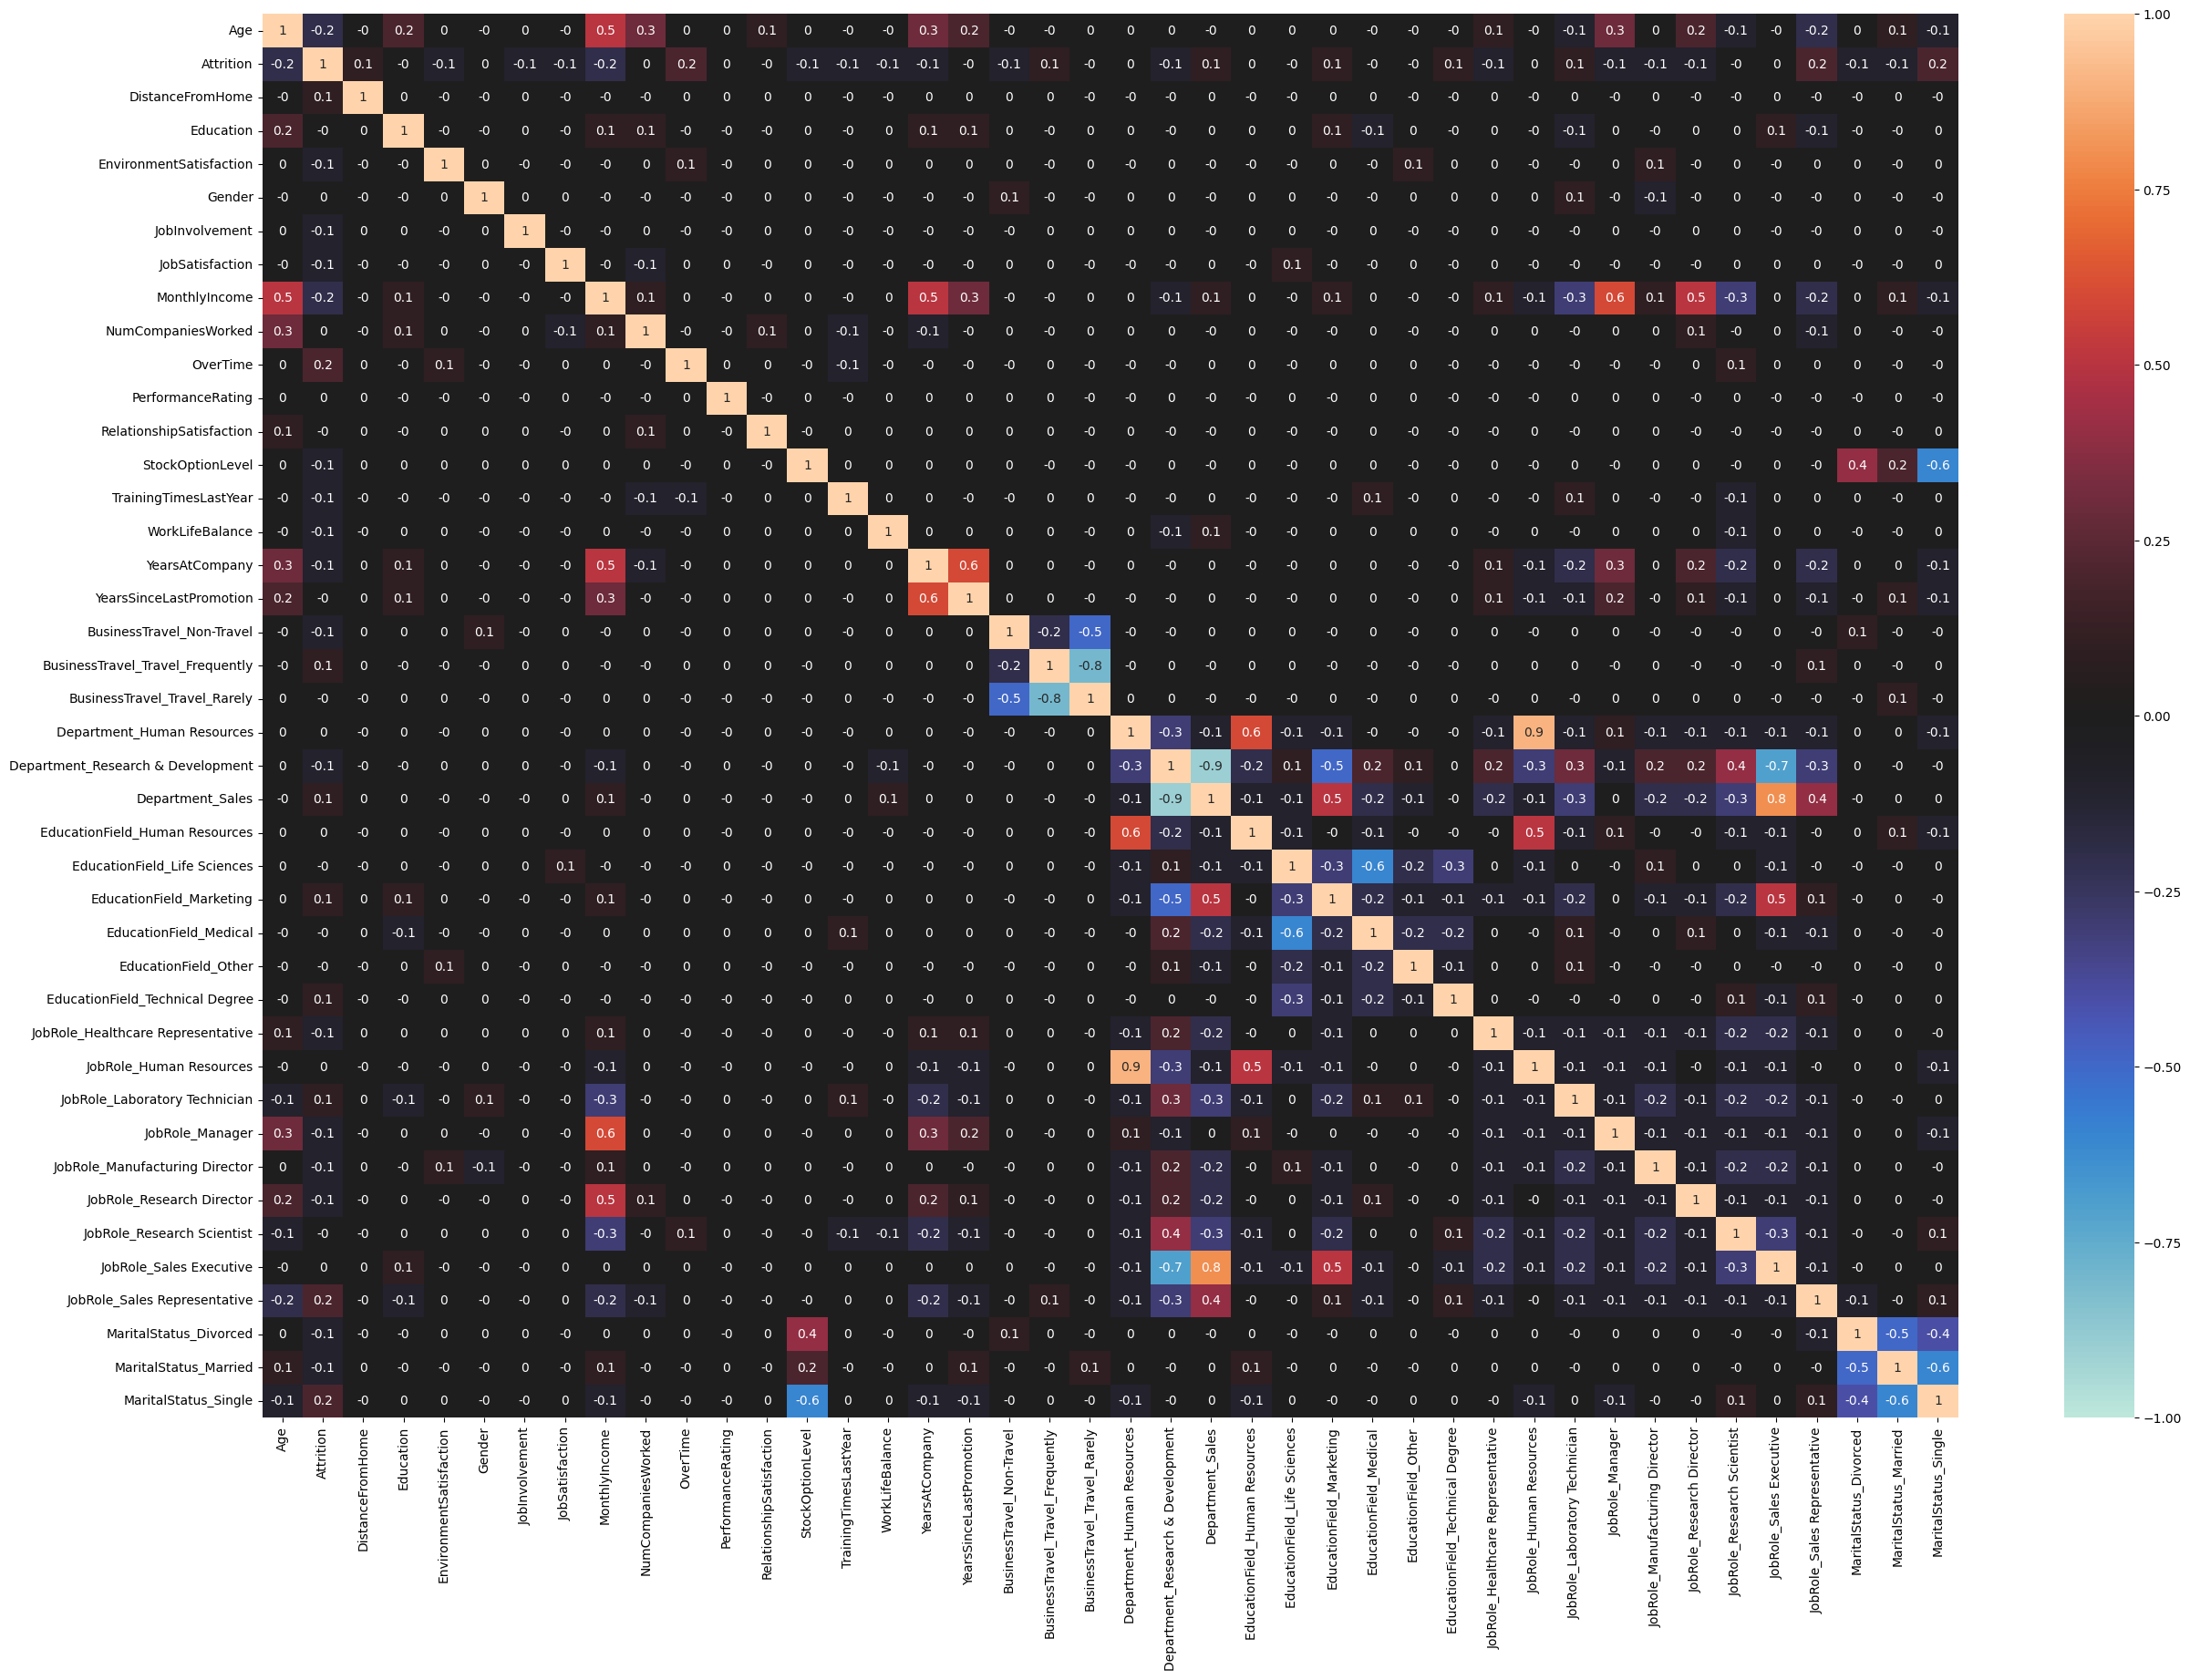

In [ ]:
fig = plt.figure(figsize=(30,20))
corr = datos.corr()
sns.heatmap(round(corr,1), vmin=-1, center=0, vmax=1, annot=True);

In [ ]:
X = datos.drop('Attrition', axis=1)
y = datos['Attrition']

In [ ]:
X

Age  DistanceFromHome  Education  EnvironmentSatisfaction  Gender  \
0     0.446350         -1.010909  -0.891688                -0.660531       0   
1     1.322365         -0.147150  -1.868426                 0.254625       1   
2     0.008343         -0.887515  -0.891688                 1.169781       1   
3    -0.429664         -0.764121   1.061787                 1.169781       0   
4    -1.086676         -0.887515  -1.868426                -1.575686       1   
...        ...               ...        ...                      ...     ...   
1465 -0.101159          1.703764  -0.891688                 0.254625       1   
1466  0.227347         -0.393938  -1.868426                 1.169781       1   
1467 -1.086676         -0.640727   0.085049                -0.660531       1   
1468  1.322365         -0.887515   0.085049                 1.169781       1   
1469 -0.320163         -0.147150   0.085049                -0.660531       1   

      JobInvolvement  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  \
0           0.379672         1.153254      -0.108350            2.125136   
1          -1.026167        -0.660853      -0.291719           -0.678049   
2          -1.026167         0.246200      -0.937654            1.324226   
3           0.379672         0.246200      -0.763634           -0.678049   
4           0.379672        -0.660853      -0.644858            2.525591   
...              ...              ...            ...                 ...   
1465        1.785511         1.153254      -0.835451            0.523316   
1466       -1.026167        -1.567907       0.741140            0.523316   
1467        1.785511        -0.660853      -0.076690           -0.678049   
1468       -1.026167        -0.660853      -0.236474           -0.277594   
1469        1.785511         0.246200      -0.445978           -0.277594   

      OverTime  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0            1          -0.426230                 -1.584178         -0.932014   
1            0           2.346151                  1.191438          0.241988   
2            1          -0.426230                 -0.658973         -0.932014   
3            1          -0.426230                  0.266233         -0.932014   
4            0          -0.426230                  1.191438          0.241988   
...        ...                ...                       ...               ...   
1465         0          -0.426230                  0.266233          0.241988   
1466         0          -0.426230                 -1.584178          0.241988   
1467         1           2.346151                 -0.658973          0.241988   
1468         0          -0.426230                  1.191438         -0.932014   
1469         0          -0.426230                 -1.584178         -0.932014   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 -2.171982        -2.493820       -0.164613   
1                  0.155707         0.338096        0.488508   
2                  0.155707         0.338096       -1.144294   
3                  0.155707         0.338096        0.161947   
4                  0.155707         0.338096       -0.817734   
...                     ...              ...             ...   
1465               0.155707         0.338096       -0.327893   
1466               1.707500         0.338096       -0.001333   
1467              -2.171982         0.338096       -0.164613   
1468               0.155707        -1.077862        0.325228   
1469               0.155707         1.754054       -0.491174   

      YearsSinceLastPromotion  BusinessTravel_Non-Travel  \
0                   -0.679146                          0   
1                   -0.368715                          0   
2                   -0.679146                          0   
3                    0.252146                          0   
4                   -0.058285                          0   
...                       ...      

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
#X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

#sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
#sns.set_context("poster",font_scale = .7)
#plt.subplots(figsize=(20,6))
#sns.countplot(x=y);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [ ]:
counter1 = Counter(y_test)
print(counter1)

Counter({0: 247, 1: 47})


In [ ]:
counter1 = Counter(y_train)
print(counter1)

Counter({0: 986, 1: 190})


In [ ]:
X_train

Age  DistanceFromHome  Education  EnvironmentSatisfaction  Gender  \
1194  1.103362         -0.887515   1.061787                -0.660531       0   
128  -1.634185         -0.887515  -1.868426                 0.254625       1   
810   0.993860         -0.764121  -1.868426                -1.575686       1   
478  -1.305679          0.469821  -1.868426                -0.660531       1   
491   0.665354         -0.023755   2.038524                 1.169781       1   
...        ...               ...        ...                      ...     ...   
1213 -1.524683         -0.270544   0.085049                 0.254625       1   
963   0.117845         -0.887515  -0.891688                -0.660531       0   
734  -1.634185         -0.147150  -1.868426                -0.660531       1   
1315 -0.101159         -0.887515   1.061787                 1.169781       0   
1292  0.227347          1.333581   0.085049                 0.254625       1   

      JobInvolvement  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  \
1194        1.785511        -0.660853       2.011975            1.324226   
128         0.379672         1.153254      -0.845650           -1.078504   
810         0.379672         0.246200       2.329206            0.122861   
478         0.379672         0.246200      -0.936379           -0.678049   
491         0.379672         0.246200      -0.175068            0.122861   
...              ...              ...            ...                 ...   
1213        0.379672         1.153254      -0.898345           -0.678049   
963         0.379672        -1.567907       0.082881            0.122861   
734        -2.432006        -1.567907      -0.860949           -0.678049   
1315        0.379672        -0.660853       0.097542            0.523316   
1292        0.379672         1.153254      -0.504835           -0.277594   

      OverTime  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
1194         0          -0.426230                  0.266233          2.589994   
128          0          -0.426230                  0.266233          0.241988   
810          0          -0.426230                  1.191438          0.241988   
478          0          -0.426230                  0.266233         -0.932014   
491          1          -0.426230                 -0.658973          0.241988   
...        ...                ...                       ...               ...   
1213         1           2.346151                 -0.658973          0.241988   
963          0          -0.426230                  1.191438          0.241988   
734          0          -0.426230                 -1.584178          0.241988   
1315         1           2.346151                  1.191438          0.241988   
1292         0          -0.426230                  1.191438          0.241988   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1194              -0.620189         0.338096       -0.654454   
128               -0.620189         0.338096       -0.817734   
810                0.155707         0.338096        0.815068   
478               -1.396086         0.338096       -0.001333   
491                0.155707         0.338096        0.161947   
...                     ...              ...             ...   
1213              -0.620189         0.338096       -0.654454   
963                0.155707         0.338096       -0.001333   
734                0.155707        -1.077862       -0.491174   
1315              -0.620189         0.338096       -0.981014   
1292               2.483396         0.338096       -0.817734   

      YearsSinceLastPromotion  BusinessTravel_Non-Travel  \
1194                -0.368715                          0   
128                 -0.058285                          0   
810                  0.562576                          0   
478                 -0.679146                          0   
491                  0.562576                          0   
...                       ...      

In [ ]:
# Creamos una instancia de RandomUnderSampler
rus = RandomUnderSampler()

# Submuestreamos los datos de entrenamiento
X_underResampled, y_underResampled = rus.fit_resample(X_train, y_train)

counter = Counter(y_underResampled)
print(counter)

Counter({0: 190, 1: 190})


In [ ]:
# Creamos una instancia de RandomUnderSampler
ros = RandomOverSampler()

# Sobremuestreamos los datos de entrenamiento
X_overResampled, y_overResampled = ros.fit_resample(X_train, y_train)
X_overResampled.shape
y_overResampled.shape

counter = Counter(y_overResampled)
print(counter)

Counter({0: 986, 1: 986})


https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score


clf = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_train, y_train)

model_logRg_norm = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_log = model_logRg_norm.predict(X_test)
print(model_logRg_norm.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_log))
print(classification_report(y_test, prd_log))

report = classification_report(prd_log, y_test, output_dict=True)

df = pd.DataFrame(report)
df.to_latex('report_logRegress_normal.tex')


Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Puntuación de validación cruzada: 0.8852145690587812
0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.81      0.28      0.41        47

    accuracy                           0.87       294
   macro avg       0.85      0.63      0.67       294
weighted avg       0.87      0.87      0.85       294



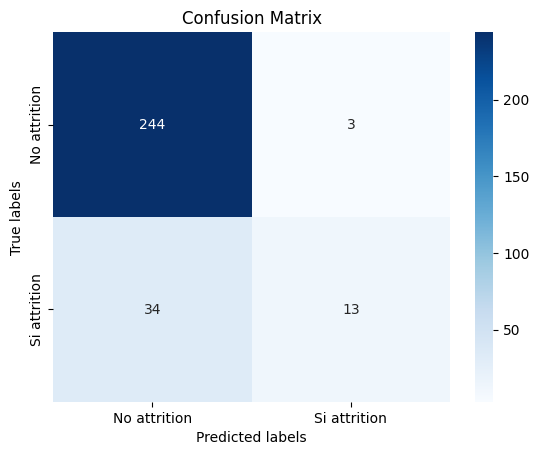

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)


                            Variable  Importancia
9                           OverTime     1.188482
18  BusinessTravel_Travel_Frequently     0.549858
31     JobRole_Laboratory Technician     0.544903
17         BusinessTravel_Non-Travel     0.452240
0                                Age     0.445490
15                    YearsAtCompany     0.443640
37      JobRole_Sales Representative     0.365009
3            EnvironmentSatisfaction     0.354928
16           YearsSinceLastPromotion     0.335527
8                 NumCompaniesWorked     0.333127


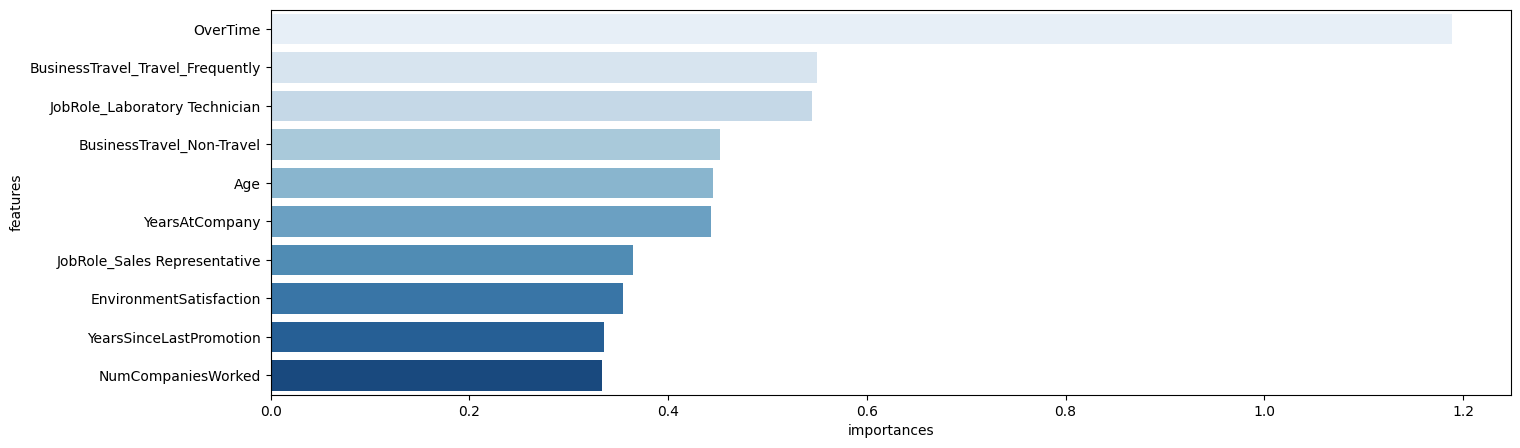

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(model_logRg_norm.coef_)[0]}).sort_values("Importancia", ascending=False).head(10))

importances = np.abs(model_logRg_norm.coef_)[0]
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
clf = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_overResampled, y_overResampled)

model_logRg_over = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_log = grid_search.predict(X_test)
print(grid_search.score(X_test,y_test))
#print(balanced_accuracy_score(y_test, prueba))
print(classification_report(y_test, prd_log))


Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Puntuación de validación cruzada: 0.7845158388485511
0.7925170068027211
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       247
           1       0.41      0.66      0.50        47

    accuracy                           0.79       294
   macro avg       0.67      0.74      0.69       294
weighted avg       0.84      0.79      0.81       294



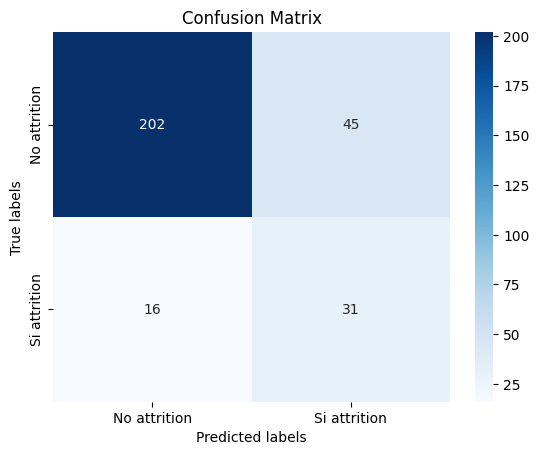

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)


                             Variable  Importancia
9                            OverTime     1.350945
17          BusinessTravel_Non-Travel     0.952598
31      JobRole_Laboratory Technician     0.822781
21  Department_Research & Development     0.686436
18   BusinessTravel_Travel_Frequently     0.552978
34          JobRole_Research Director     0.529413
27               EducationField_Other     0.503682
29  JobRole_Healthcare Representative     0.491066
3             EnvironmentSatisfaction     0.454274
38             MaritalStatus_Divorced     0.435467
16            YearsSinceLastPromotion     0.433605
23     EducationField_Human Resources     0.429939
15                     YearsAtCompany     0.410155
37       JobRole_Sales Representative     0.399179
33     JobRole_Manufacturing Director     0.368038
5                      JobInvolvement     0.362744
39              MaritalStatus_Married     0.344641
0                                 Age     0.333288
4                              

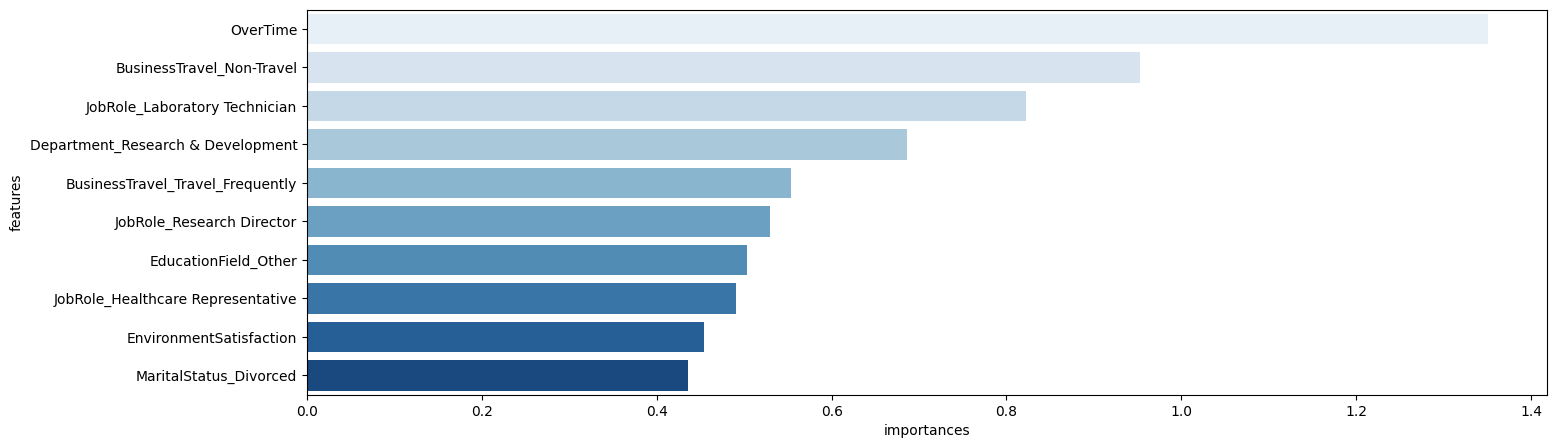

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(model_logRg_over.coef_)[0]}).sort_values("Importancia", ascending=False).head(20))


importances = np.abs(model_logRg_over.coef_)[0]
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
clf = LogisticRegression()

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X_underResampled, y_underResampled)

model_logRg_under = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_log = grid_search.predict(X_test)
print(grid_search.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prueba))
print(classification_report(y_test, prd_log))

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Puntuación de validación cruzada: 0.75
0.7551020408163265
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       247
           1       0.36      0.68      0.47        47

    accuracy                           0.76       294
   macro avg       0.64      0.73      0.66       294
weighted avg       0.84      0.76      0.78       294



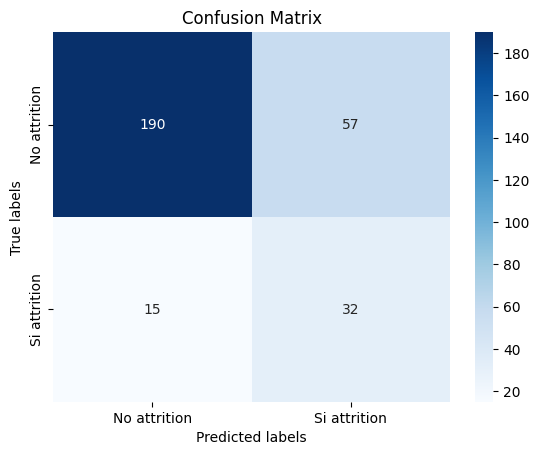

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                             Variable  Importancia
9                            OverTime     0.933116
31      JobRole_Laboratory Technician     0.463726
18   BusinessTravel_Travel_Frequently     0.387471
7                       MonthlyIncome     0.380351
27               EducationField_Other     0.348921
37       JobRole_Sales Representative     0.347520
3             EnvironmentSatisfaction     0.342273
17          BusinessTravel_Non-Travel     0.331209
35         JobRole_Research Scientist     0.328945
21  Department_Research & Development     0.323176
40               MaritalStatus_Single     0.291583
22                   Department_Sales     0.290326
6                     JobSatisfaction     0.261809
8                  NumCompaniesWorked     0.254108
15                     YearsAtCompany     0.251476
12                   StockOptionLevel     0.244482
0                                 Age     0.224486
5                      JobInvolvement     0.220308
29  JobRole_Healthcare Represen

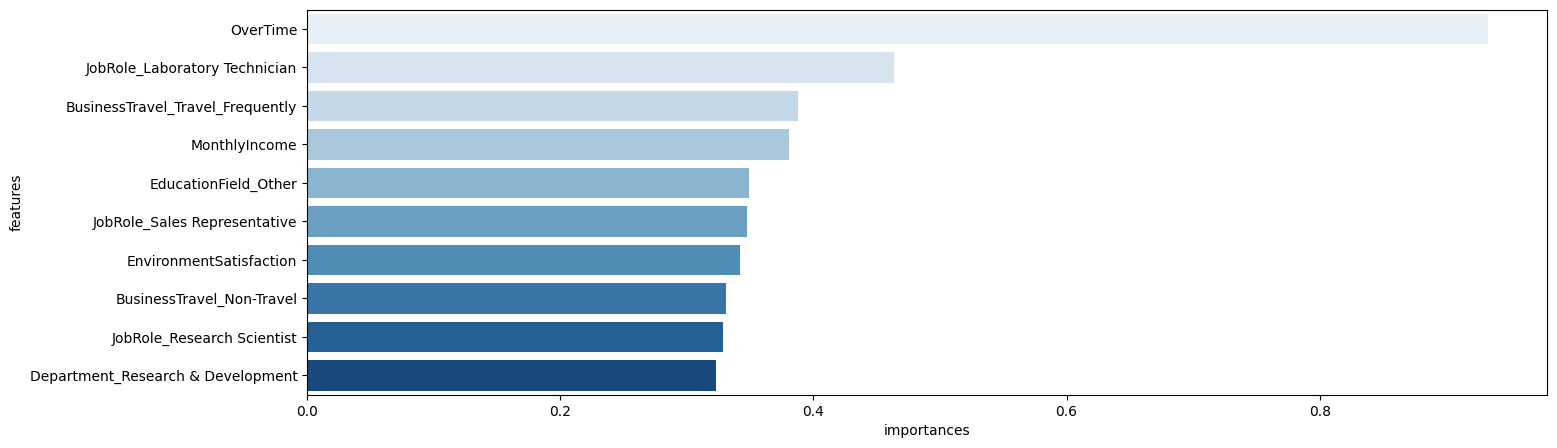

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(model_logRg_under.coef_)[0]}).sort_values("Importancia", ascending=False).head(20))

importances = np.abs(model_logRg_under.coef_)[0]
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

#Decision tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=42) 

dtc_param_grid = { 'max_depth': [2, 3, 5, 10, 20], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf':[1, 5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"] }

grid_search = GridSearchCV(dtc, dtc_param_grid, cv=5)

grid_search.fit(X_train, y_train)

model_dtc_norm = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_dtc_norm = model_dtc_norm.predict(X_test)
print(model_dtc_norm.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_dtc_norm))
print(classification_report(y_test, prd_dtc_norm))

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20, 'min_samples_split': 2}
Puntuación de validación cruzada: 0.8452398124774613
0.8537414965986394
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.62      0.21      0.32        47

    accuracy                           0.85       294
   macro avg       0.75      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294



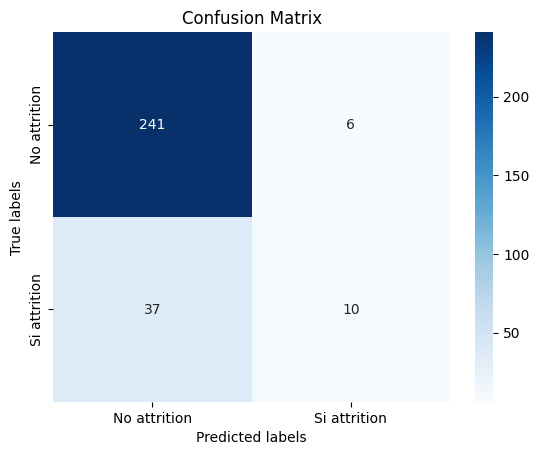

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_dtc_norm), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

           Variable  Importancia
15   YearsAtCompany     0.298914
9          OverTime     0.251796
0               Age     0.251137
7     MonthlyIncome     0.157815
14  WorkLifeBalance     0.040338


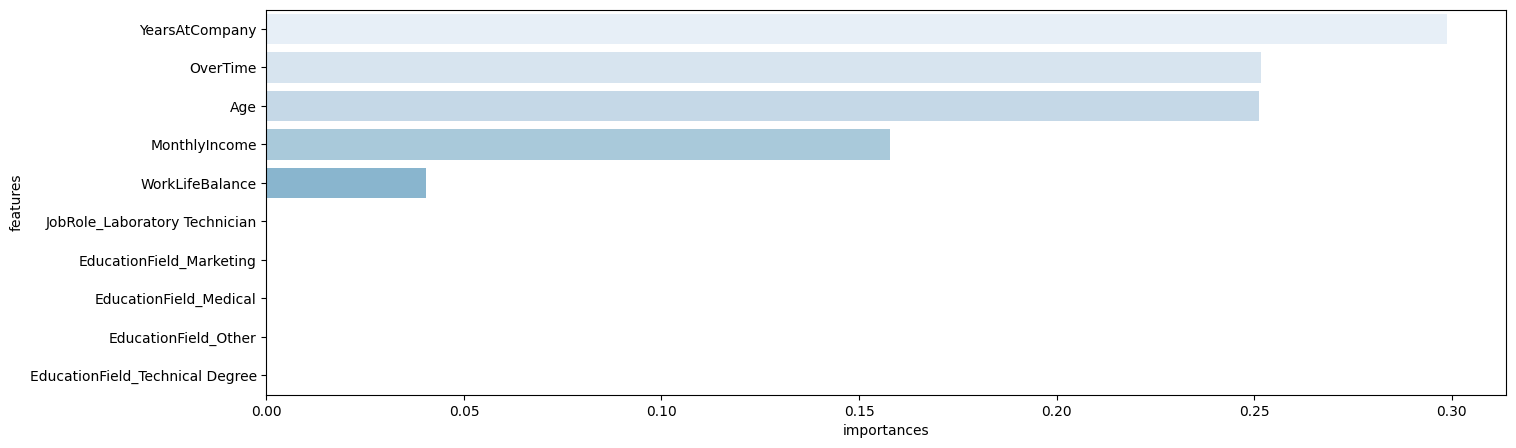

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_dtc_norm.feature_importances_}).sort_values("Importancia", ascending=False).head())

importances = model_dtc_norm.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

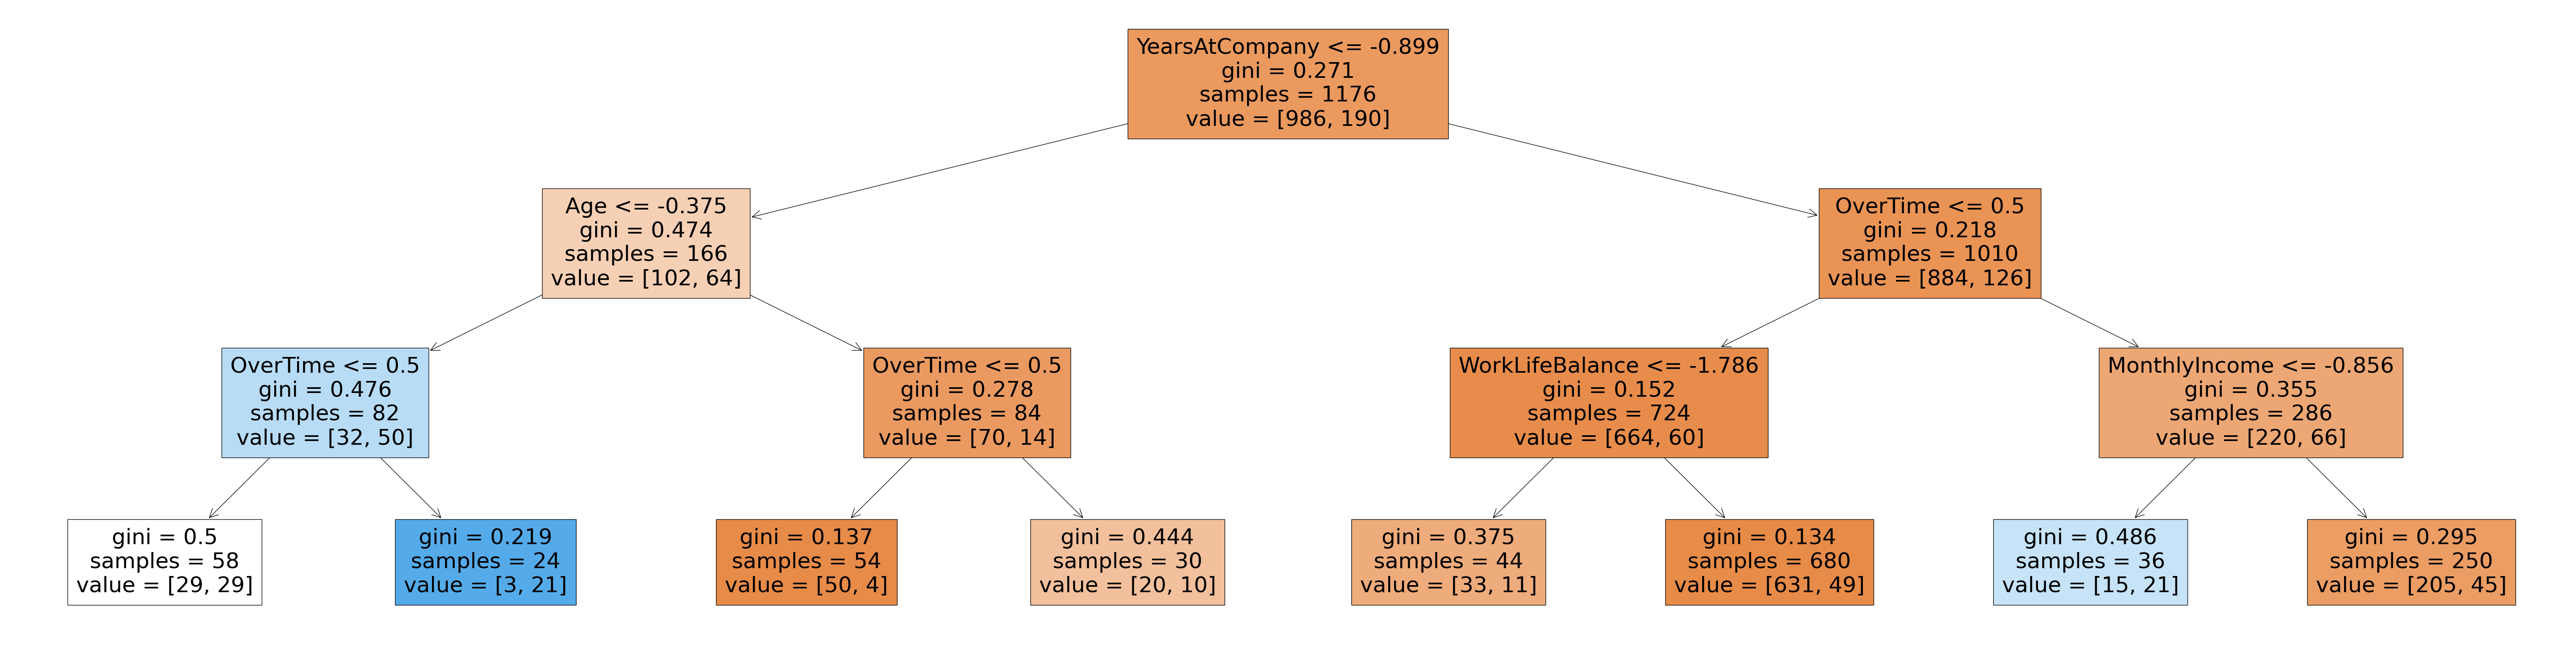

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model_dtc_norm, feature_names=X.columns, max_depth=4, filled=True);

In [ ]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc_param_grid = { 'max_depth': [2, 3, 5, 10, 20], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf':[1, 5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"] }


grid_search = GridSearchCV(dtc, dtc_param_grid, cv=5)

grid_search.fit(X_overResampled, y_overResampled)

model_dtc_over = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_dtc_over = model_dtc_over.predict(X_test)
print(model_dtc_over.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_dtc_over))
print(classification_report(y_test, prd_dtc_over))


Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Puntuación de validación cruzada: 0.9208944290946475
0.8027210884353742
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       247
           1       0.31      0.19      0.24        47

    accuracy                           0.80       294
   macro avg       0.58      0.56      0.56       294
weighted avg       0.77      0.80      0.78       294



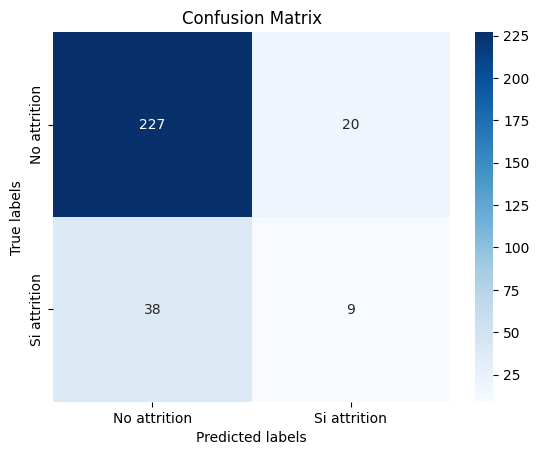

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_dtc_over), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

              Variable  Importancia
0                  Age     0.140593
15      YearsAtCompany     0.110212
1     DistanceFromHome     0.099867
8   NumCompaniesWorked     0.083114
7        MonthlyIncome     0.070088


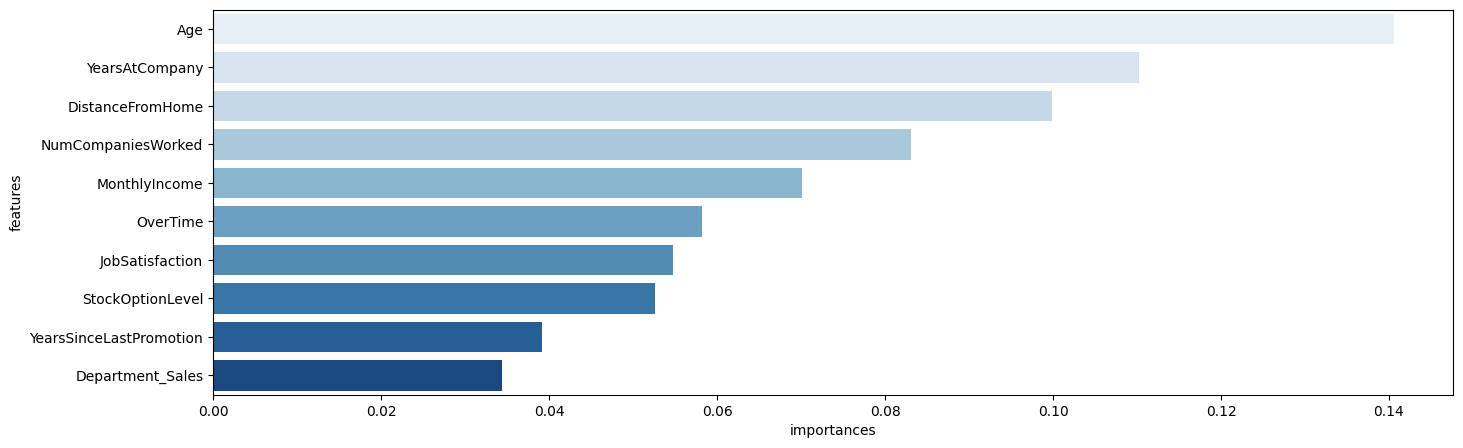

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_dtc_over.feature_importances_}).sort_values("Importancia", ascending=False).head())

importances = model_dtc_over.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

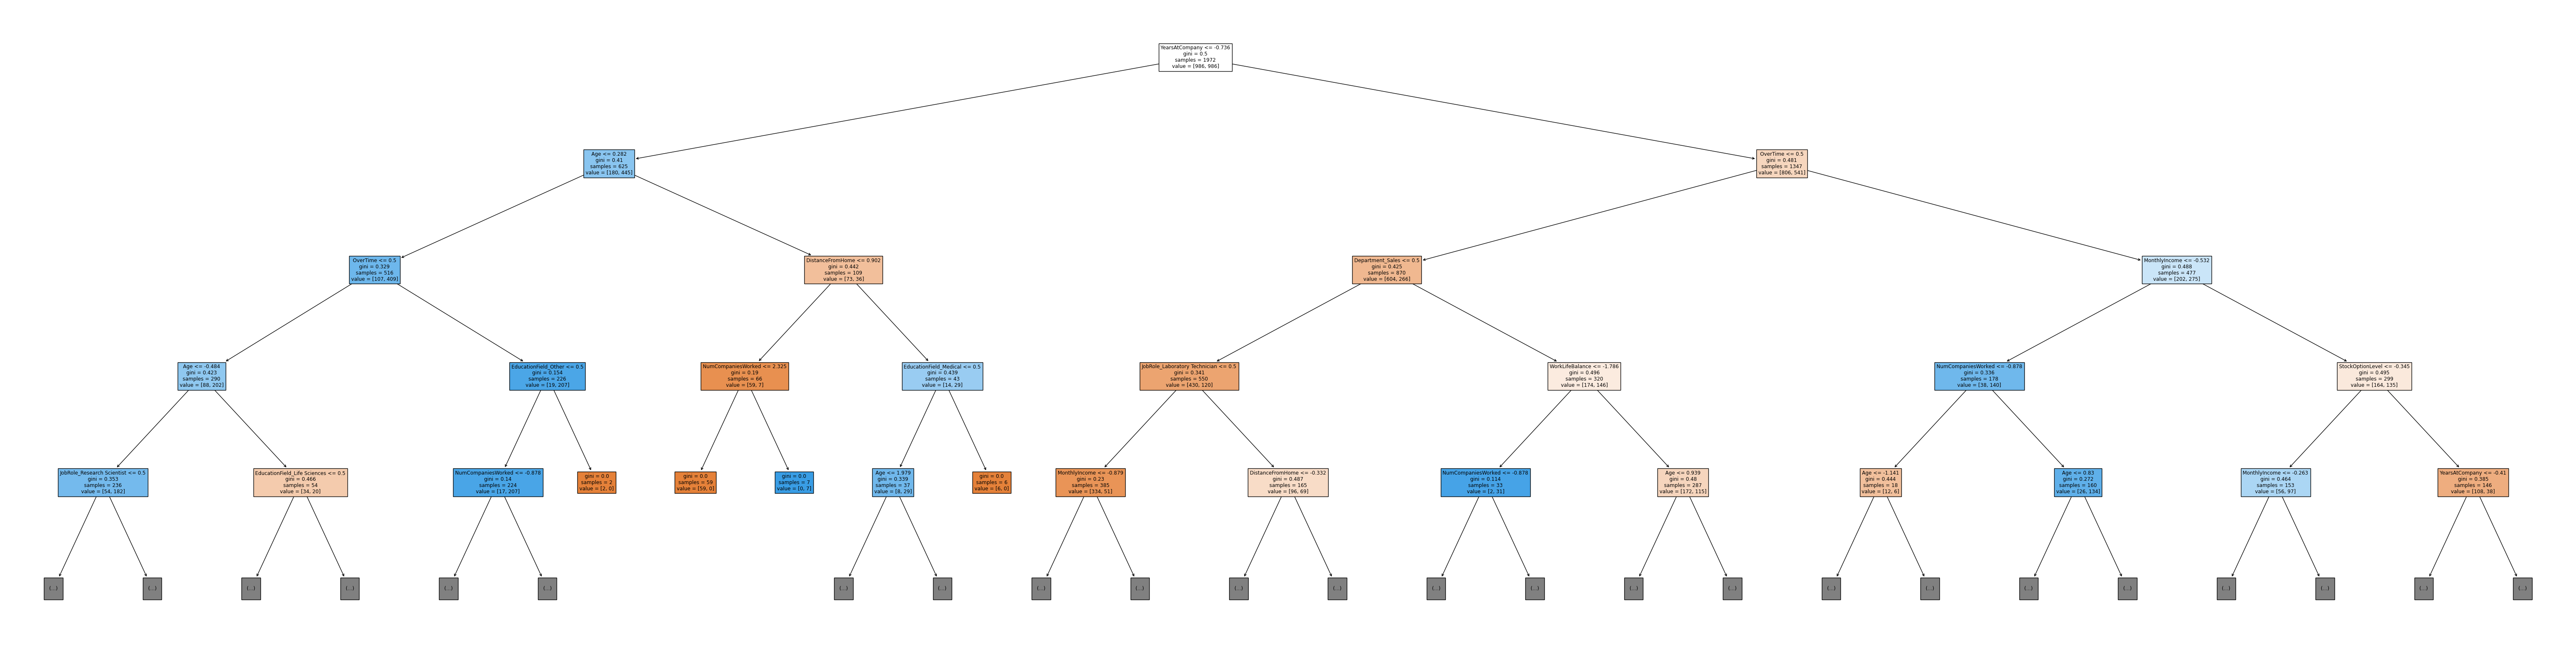

In [ ]:
plt.figure(figsize =(80,20))

plot_tree(model_dtc_over, feature_names=X.columns, max_depth=4, filled=True);

In [ ]:
dtc = DecisionTreeClassifier(random_state=42) 
dtc_param_grid = { 'max_depth': [2, 3, 5, 10, 20], 'min_samples_split': [1, 2, 5, 10], 'min_samples_leaf':[1, 5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"] }

grid_search = GridSearchCV(dtc, dtc_param_grid, cv=5)

grid_search.fit(X_underResampled, y_underResampled)

model_dtc_under = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_dtc_under = model_dtc_over.predict(X_test)
print(model_dtc_over.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_dtc_under))
print(classification_report(y_test, prd_dtc_under))

Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Puntuación de validación cruzada: 0.7
0.8027210884353742
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       247
           1       0.31      0.19      0.24        47

    accuracy                           0.80       294
   macro avg       0.58      0.56      0.56       294
weighted avg       0.77      0.80      0.78       294



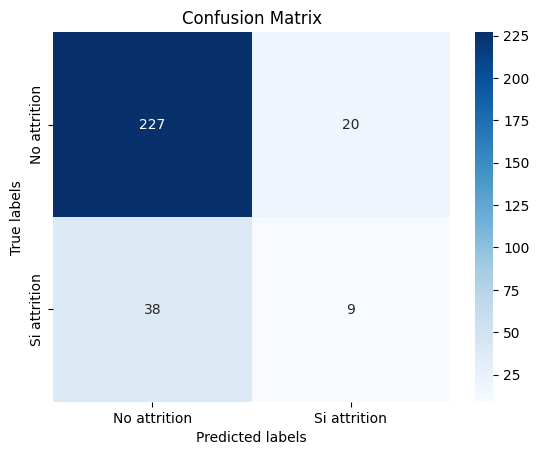

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_dtc_under), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

            Variable  Importancia
15    YearsAtCompany     0.217872
9           OverTime     0.122057
7      MonthlyIncome     0.112366
5     JobInvolvement     0.079762
1   DistanceFromHome     0.074423


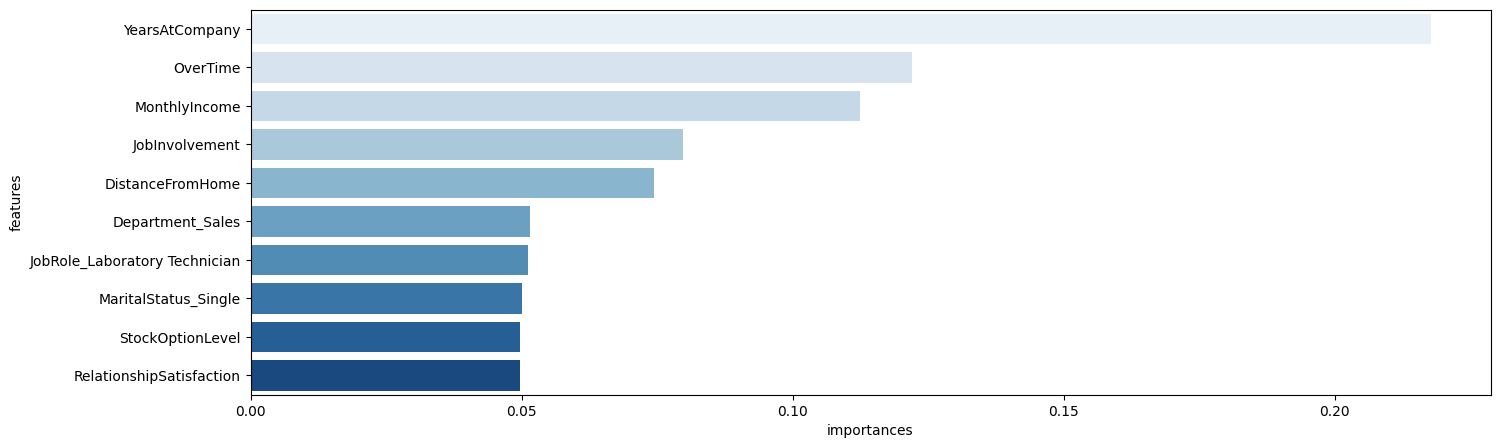

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_dtc_under.feature_importances_}).sort_values("Importancia", ascending=False).head())

importances = model_dtc_under.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

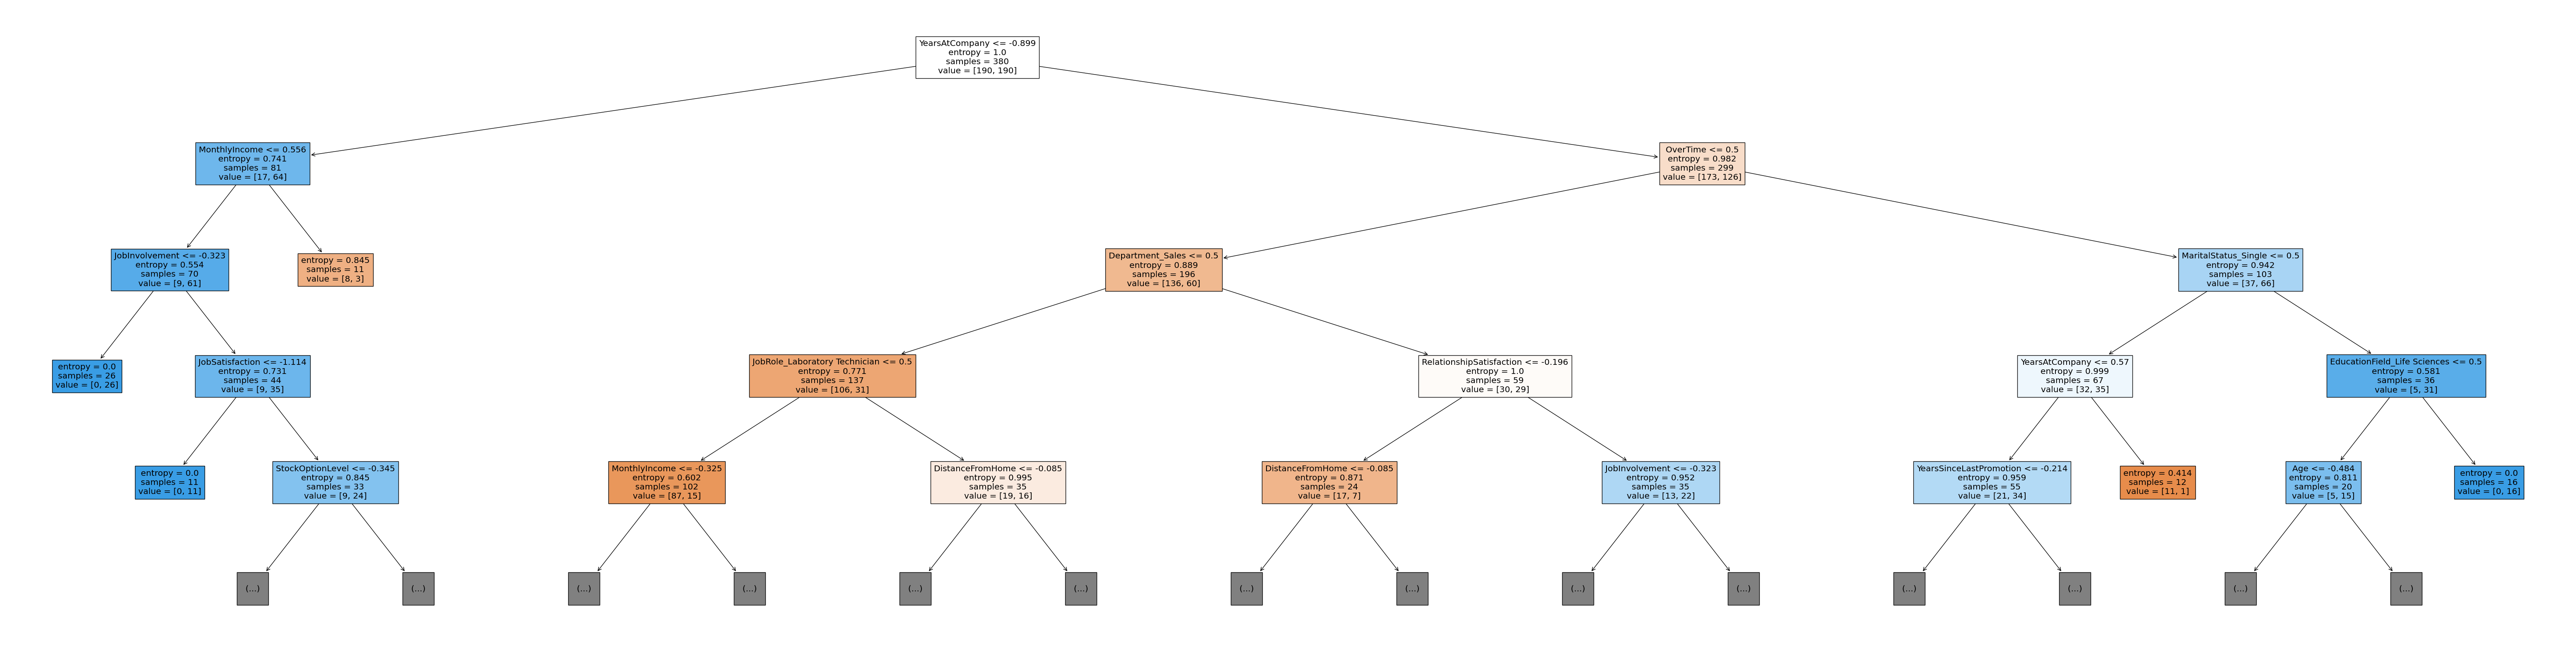

In [ ]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(model_dtc_under, feature_names=X.columns, max_depth=4, filled=True);

#XGB

In [ ]:
params = {
"subsample":[0.75, 1],
                "colsample_bytree":[0.75, 1],
                 "max_depth":[2, 6],
                 "min_child_weight":[1, 5],
                "learning_rate":[0.1, 0.01]}

gs2 = GridSearchCV(xgb.XGBClassifier(), params, cv=5)
gs2.fit(X_train, y_train)

model_xgb_norm = gs2.best_estimator_

print('Mejores hiperparámetros:', gs2.best_params_)
print('Puntuación de validación cruzada:', gs2.best_score_)

prd_xgb_norm = model_xgb_norm.predict(X_test)
print(gs2.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_xgb_norm))
print(classification_report(y_test, prd_xgb_norm))

Mejores hiperparámetros: {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.75}
Puntuación de validación cruzada: 0.8767147493689146
0.8537414965986394
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       247
           1       0.62      0.21      0.32        47

    accuracy                           0.85       294
   macro avg       0.75      0.59      0.62       294
weighted avg       0.83      0.85      0.82       294



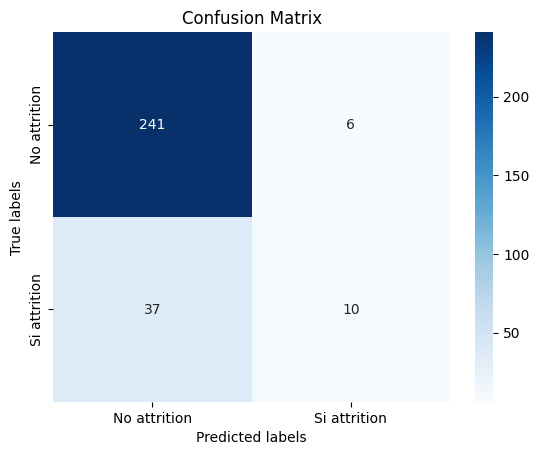

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_xgb_norm), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                            Variable  Importancia
9                           OverTime     0.052997
37      JobRole_Sales Representative     0.047248
12                  StockOptionLevel     0.042856
18  BusinessTravel_Travel_Frequently     0.041494
40              MaritalStatus_Single     0.039783


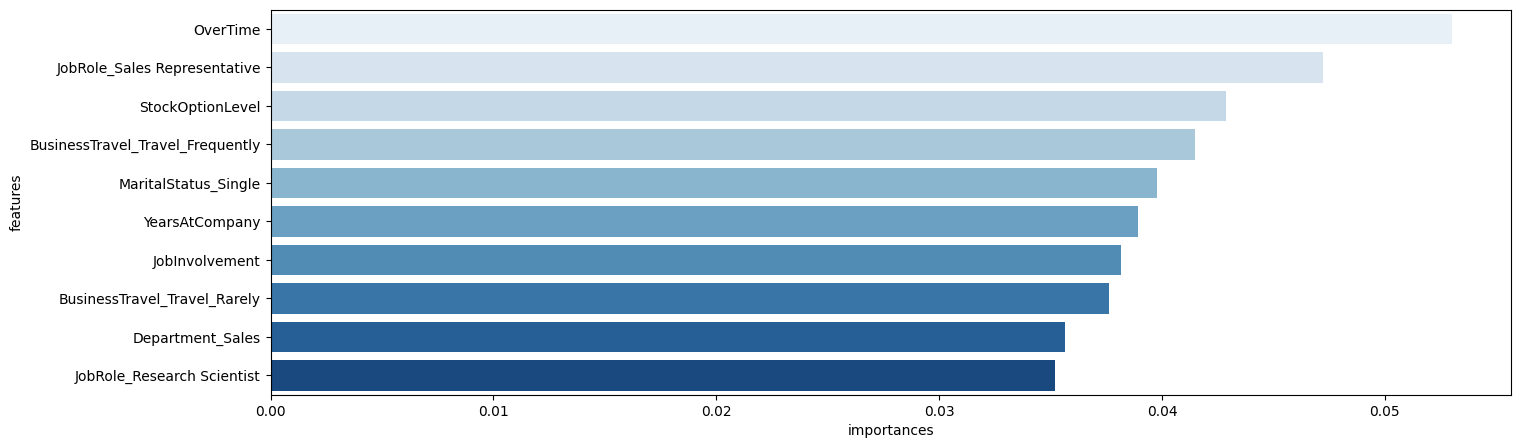

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_xgb_norm.feature_importances_}).sort_values("Importancia", ascending=False).head())

importances = model_xgb_norm.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
params = {
        "subsample":[0.75, 1],
        "colsample_bytree":[0.75, 1],
          "max_depth":[2, 6],
          "min_child_weight":[1, 5],
        "learning_rate":[0.1, 0.01]}


gs2 = GridSearchCV(xgb.XGBClassifier(), params, cv=5)
gs2.fit(X_overResampled, y_overResampled)

model_xgb_over = gs2.best_estimator_

print('Mejores hiperparámetros:', gs2.best_params_)
print('Puntuación de validación cruzada:', gs2.best_score_)

prd_xgb_over = model_xgb_over.predict(X_test)
print(gs2.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_xgb_over))
print(classification_report(y_test, prd_xgb_over))

Mejores hiperparámetros: {'colsample_bytree': 0.75, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'subsample': 1}
Puntuación de validación cruzada: 0.9639979438411617
0.8469387755102041
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.53      0.34      0.42        47

    accuracy                           0.85       294
   macro avg       0.71      0.64      0.66       294
weighted avg       0.83      0.85      0.83       294



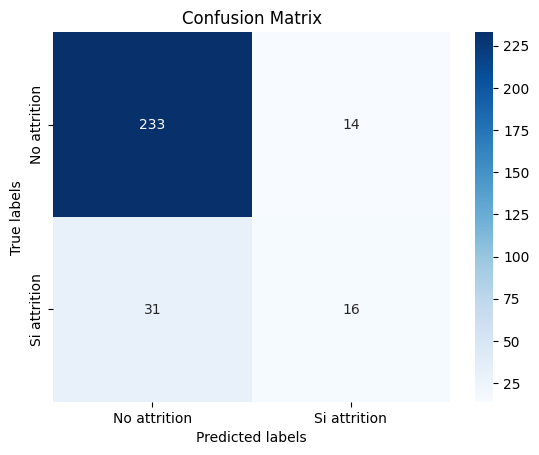

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_xgb_over), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                          Variable  Importancia
9                         OverTime     0.073200
12                StockOptionLevel     0.040519
23  EducationField_Human Resources     0.038651
15                  YearsAtCompany     0.036078
22                Department_Sales     0.035880


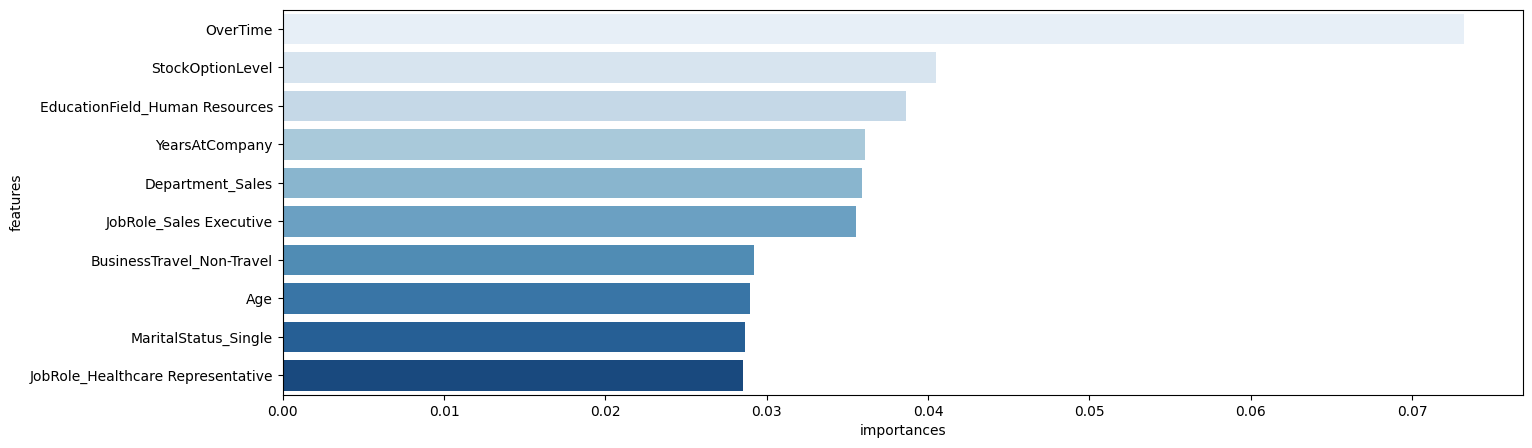

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_xgb_over.feature_importances_}).sort_values("Importancia", ascending=False).head())

importances = model_xgb_over.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
params = {
"subsample":[0.75, 1],
                "colsample_bytree":[0.75, 1],
                 "max_depth":[2, 6],
                 "min_child_weight":[1, 5],
                "learning_rate":[0.1, 0.01]}


gs2 = GridSearchCV(xgb.XGBClassifier(), params, cv=5)
gs2.fit(X_underResampled, y_underResampled)

model_xgb_under = gs2.best_estimator_

print('Mejores hiperparámetros:', gs2.best_params_)
print('Puntuación de validación cruzada:', gs2.best_score_)

prd_xgb_under = model_xgb_under.predict(X_test)
print(gs2.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_xgb_under))
print(classification_report(y_test, prd_xgb_under))

Mejores hiperparámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'subsample': 0.75}
Puntuación de validación cruzada: 0.7394736842105264
0.7925170068027211
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       247
           1       0.41      0.72      0.53        47

    accuracy                           0.79       294
   macro avg       0.68      0.76      0.70       294
weighted avg       0.85      0.79      0.81       294



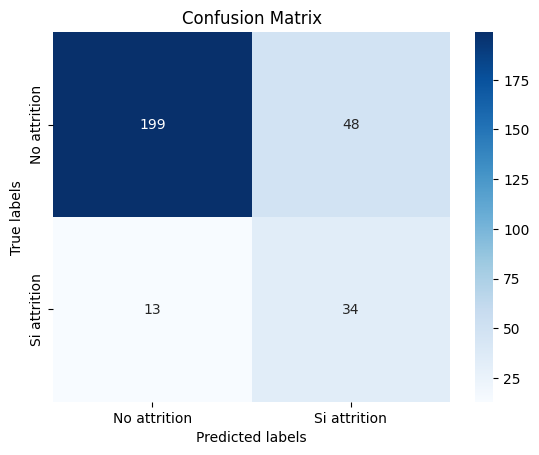

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_xgb_under), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                             Variable  Importancia
9                            OverTime     0.064841
12                   StockOptionLevel     0.054597
21  Department_Research & Development     0.051129
36            JobRole_Sales Executive     0.049976
31      JobRole_Laboratory Technician     0.048697
15                     YearsAtCompany     0.048337
39              MaritalStatus_Married     0.045615
35         JobRole_Research Scientist     0.043382
22                   Department_Sales     0.041895
7                       MonthlyIncome     0.035757
18   BusinessTravel_Travel_Frequently     0.035168
25           EducationField_Marketing     0.030817
3             EnvironmentSatisfaction     0.030432
40               MaritalStatus_Single     0.030274
5                      JobInvolvement     0.030159


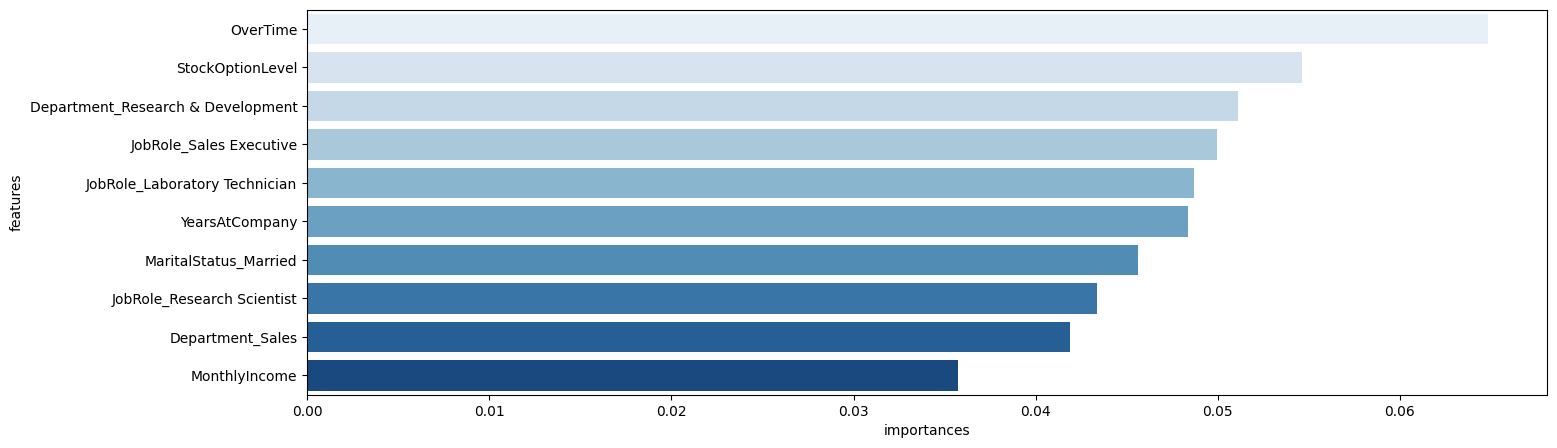

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_xgb_under.feature_importances_}).sort_values("Importancia", ascending=False).head(15))

importances = model_xgb_under.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

#Random Forest

In [ ]:
criteria = list(['gini','entropy'])
maxfeatures = list(['sqrt','log2','auto'])
bootstraps = list([True, False])

rfc = RandomForestClassifier(random_state=1)
param_grid = dict(criterion=criteria,max_features=maxfeatures,bootstrap=bootstraps)

grid = GridSearchCV(rfc, param_grid, cv = 5)

grid.fit(X_train, y_train)

model_rf_norm = grid.best_estimator_

print('Mejores hiperparámetros:', grid.best_params_)
print('Puntuación de validación cruzada:', grid.best_score_)

prd_rf_norm = model_rf_norm.predict(X_test)
print(grid.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_rf_norm))
print(classification_report(y_test, prd_rf_norm))

Mejores hiperparámetros: {'bootstrap': False, 'criterion': 'entropy', 'max_features': 'sqrt'}
Puntuación de validación cruzada: 0.8673494410385864
0.8469387755102041
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       247
           1       0.62      0.11      0.18        47

    accuracy                           0.85       294
   macro avg       0.74      0.55      0.55       294
weighted avg       0.82      0.85      0.80       294



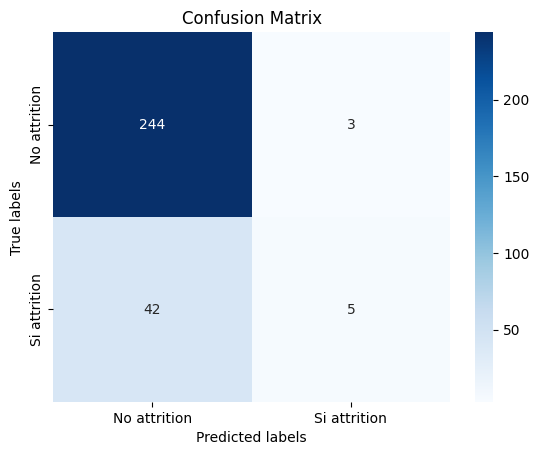

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_rf_norm), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

              Variable  Importancia
7        MonthlyIncome     0.106506
0                  Age     0.085972
15      YearsAtCompany     0.075079
1     DistanceFromHome     0.066249
8   NumCompaniesWorked     0.051539


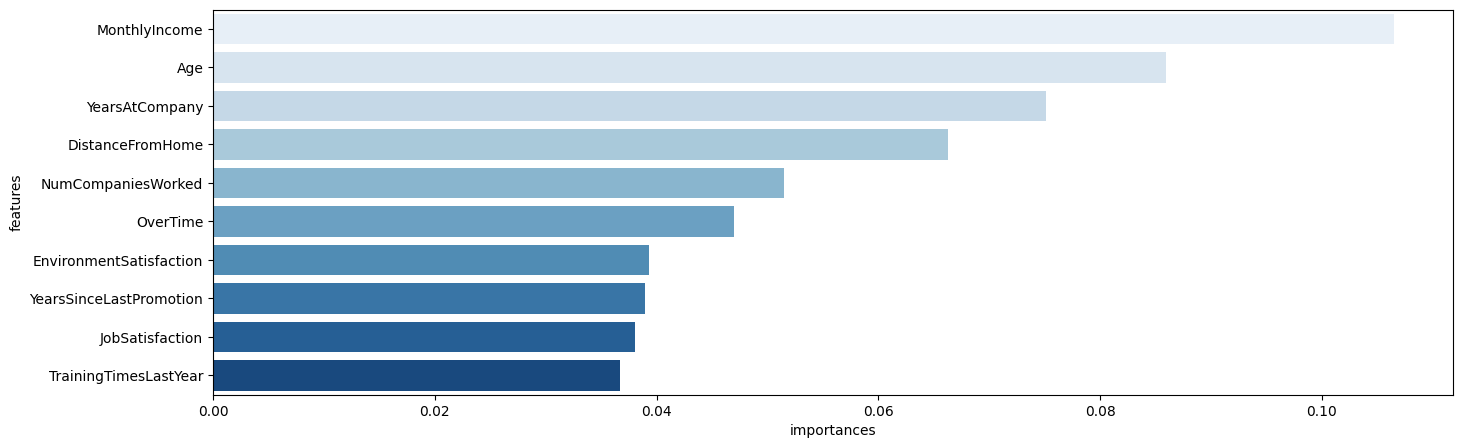

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_rf_norm.feature_importances_}).sort_values("Importancia", ascending=False).head())

importances = model_rf_norm.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
criteria = list(['gini','entropy'])
maxfeatures = list(['sqrt','log2','auto'])
bootstraps = list([True, False])

rfc = RandomForestClassifier(random_state=1)
param_grid = dict(criterion=criteria,max_features=maxfeatures,bootstrap=bootstraps)

grid = GridSearchCV(rfc, param_grid, cv = 5)

grid.fit(X_underResampled, y_underResampled)

model_rf_under = grid.best_estimator_

print('Mejores hiperparámetros:', grid.best_params_)
print('Puntuación de validación cruzada:', grid.best_score_)

prd_rf_under = model_rf_under.predict(X_test)
print(grid.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_rf_under))
print(classification_report(y_test, prd_rf_under))


Mejores hiperparámetros: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'sqrt'}
Puntuación de validación cruzada: 0.7342105263157894
0.7244897959183674
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       247
           1       0.33      0.70      0.45        47

    accuracy                           0.72       294
   macro avg       0.63      0.72      0.63       294
weighted avg       0.83      0.72      0.76       294



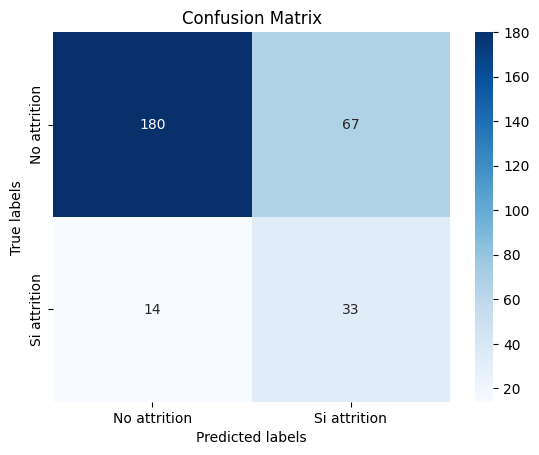

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_rf_under), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                    Variable  Importancia
7              MonthlyIncome     0.095433
0                        Age     0.086667
15            YearsAtCompany     0.076374
1           DistanceFromHome     0.057990
9                   OverTime     0.053932
8         NumCompaniesWorked     0.042669
6            JobSatisfaction     0.037545
12          StockOptionLevel     0.036246
13     TrainingTimesLastYear     0.036172
3    EnvironmentSatisfaction     0.034388
11  RelationshipSatisfaction     0.034346
16   YearsSinceLastPromotion     0.033860
14           WorkLifeBalance     0.032299
2                  Education     0.030059
5             JobInvolvement     0.029490


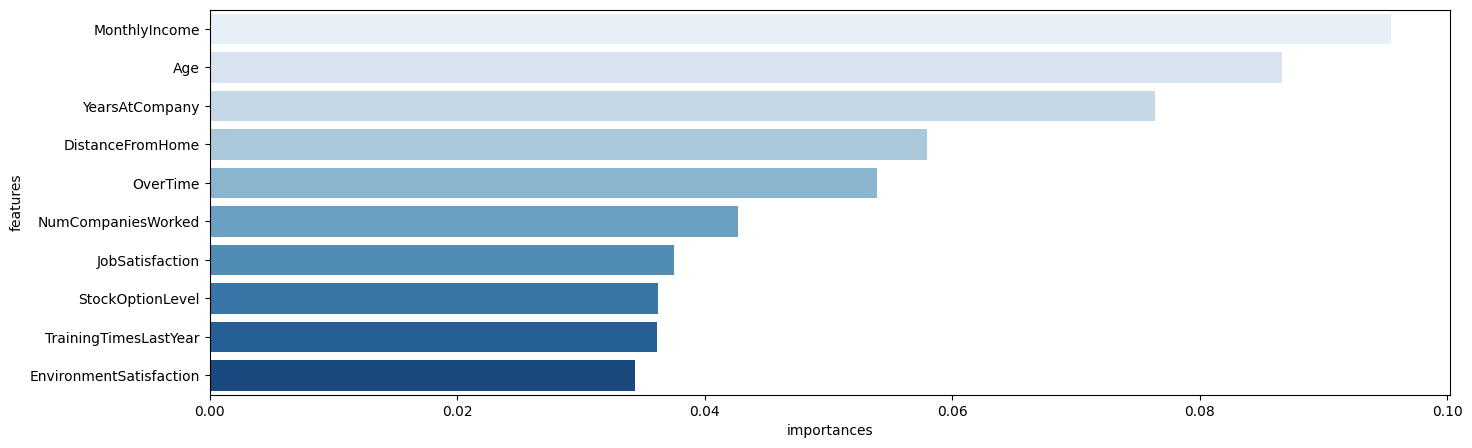

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_rf_under.feature_importances_}).sort_values("Importancia", ascending=False).head(15))

importances = model_rf_under.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
criteria = list(['gini','entropy'])
maxfeatures = list(['sqrt','log2','auto'])
bootstraps = list([True, False])

rfc = RandomForestClassifier(random_state=1)
param_grid = dict(criterion=criteria,max_features=maxfeatures,bootstrap=bootstraps)

grid = GridSearchCV(rfc, param_grid, cv = 5)

grid.fit(X_overResampled, y_overResampled)
model_rf_over = grid.best_estimator_

print('Mejores hiperparámetros:', grid.best_params_)
print('Puntuación de validación cruzada:', grid.best_score_)

prd_rf_over = model_rf_over.predict(X_test)
print(grid.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_rf_over))
print(classification_report(y_test, prd_rf_over))

Mejores hiperparámetros: {'bootstrap': False, 'criterion': 'gini', 'max_features': 'log2'}
Puntuación de validación cruzada: 0.9929023967101458
0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       247
           1       0.86      0.13      0.22        47

    accuracy                           0.86       294
   macro avg       0.86      0.56      0.57       294
weighted avg       0.86      0.86      0.81       294



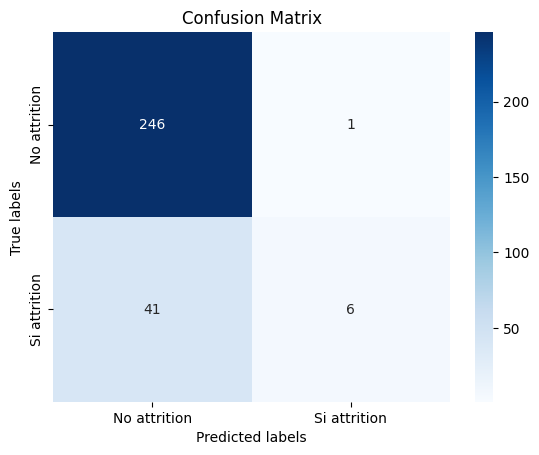

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_rf_over), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

            Variable  Importancia
7      MonthlyIncome     0.099340
0                Age     0.087232
15    YearsAtCompany     0.075971
1   DistanceFromHome     0.065335
9           OverTime     0.055676


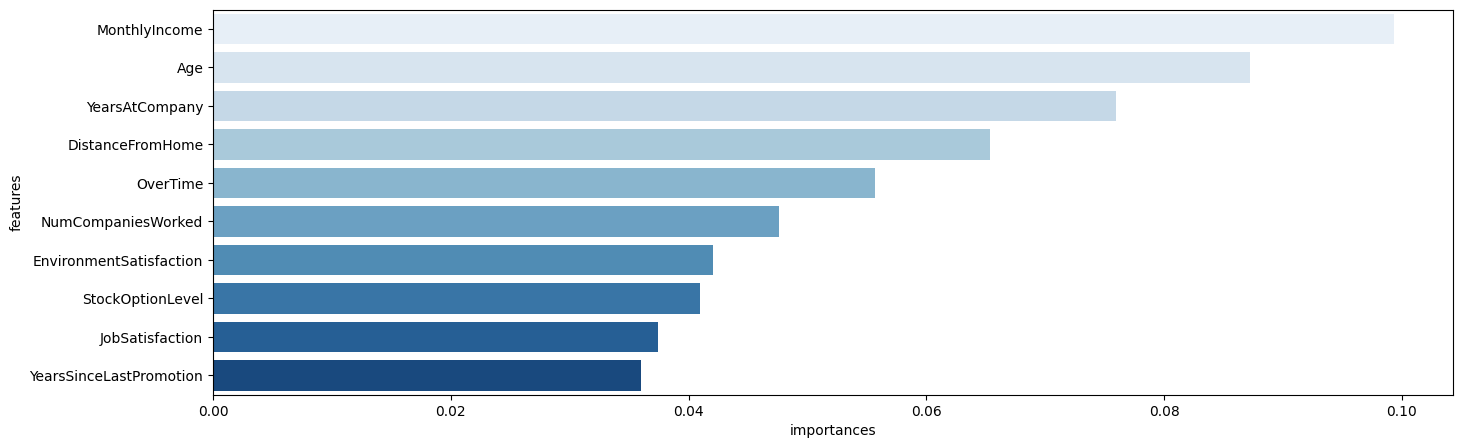

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": model_rf_over.feature_importances_}).sort_values("Importancia", ascending=False).head())

importances = model_rf_over.feature_importances_
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

#SVC

In [ ]:
from sklearn import svm

svc = SVC(random_state=42, kernel='linear') 
svc_param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'] }

grid_search = GridSearchCV(svc, svc_param_grid, cv=5)

grid_search.fit(X_train, y_train)

model_svc_norm = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_svc_norm = model_svc_norm.predict(X_test)
print(grid_search.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_svc_norm))
print(classification_report(y_test, prd_svc_norm))

Mejores hiperparámetros: {'C': 10, 'gamma': 'scale'}
Puntuación de validación cruzada: 0.8818139199423006
0.8639455782312925
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       247
           1       0.65      0.32      0.43        47

    accuracy                           0.86       294
   macro avg       0.77      0.64      0.68       294
weighted avg       0.85      0.86      0.84       294



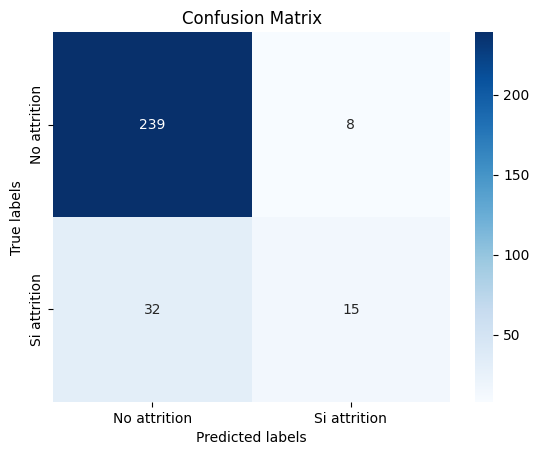

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_svc_norm), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                             Variable  Importancia
9                            OverTime     1.126652
34          JobRole_Research Director     0.989782
37       JobRole_Sales Representative     0.737763
27               EducationField_Other     0.663468
29  JobRole_Healthcare Representative     0.584851


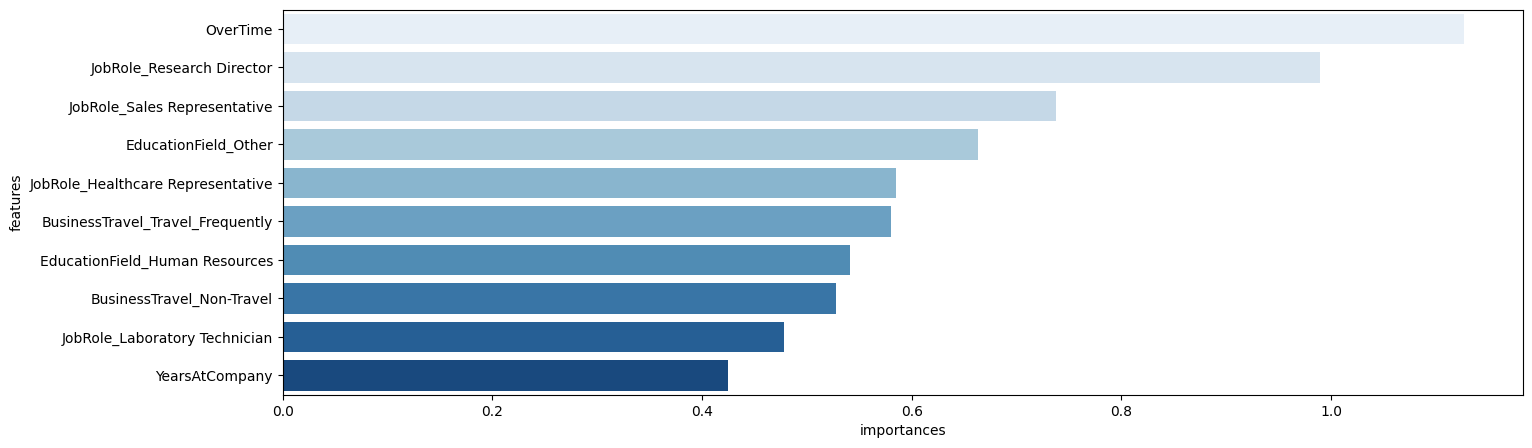

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(model_svc_norm.coef_)[0]}).sort_values("Importancia", ascending=False).head())

importances = np.abs(model_svc_norm.coef_)[0]
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
svc = SVC(random_state=42, kernel='linear') 
svc_param_grid = { 'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'] }

grid_search = GridSearchCV(svc, svc_param_grid, cv=5)

grid_search.fit(X_underResampled, y_underResampled)

model_svc_under = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_svc_under = model_svc_under.predict(X_test)
print(grid_search.score(X_test,y_test))

#print(balanced_accuracy_score(y_test, prd_svc_under))
print(classification_report(y_test, prd_svc_under))

Mejores hiperparámetros: {'C': 0.1, 'gamma': 'scale'}
Puntuación de validación cruzada: 0.7447368421052631
0.782312925170068
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       247
           1       0.39      0.66      0.49        47

    accuracy                           0.78       294
   macro avg       0.66      0.73      0.68       294
weighted avg       0.84      0.78      0.80       294



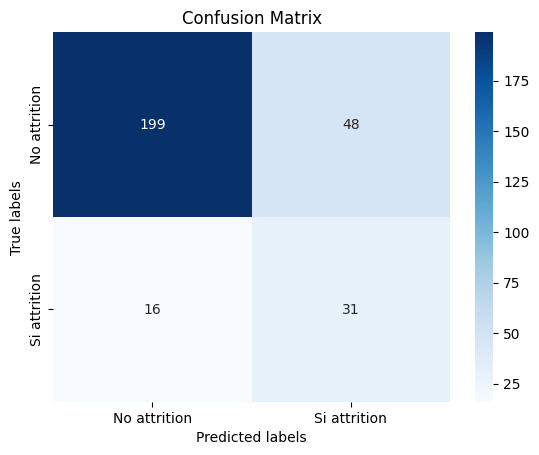

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_svc_under), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                             Variable  Importancia
9                            OverTime     1.038089
31      JobRole_Laboratory Technician     0.536750
37       JobRole_Sales Representative     0.500000
27               EducationField_Other     0.483099
7                       MonthlyIncome     0.435251
29  JobRole_Healthcare Representative     0.415509
17          BusinessTravel_Non-Travel     0.400000
18   BusinessTravel_Travel_Frequently     0.353342
4                              Gender     0.289904
40               MaritalStatus_Single     0.286172
35         JobRole_Research Scientist     0.276872
3             EnvironmentSatisfaction     0.267304
15                     YearsAtCompany     0.256022
6                     JobSatisfaction     0.253888
21  Department_Research & Development     0.231853
28    EducationField_Technical Degree     0.218822
22                   Department_Sales     0.205306
16            YearsSinceLastPromotion     0.201246
8                  NumCompanies

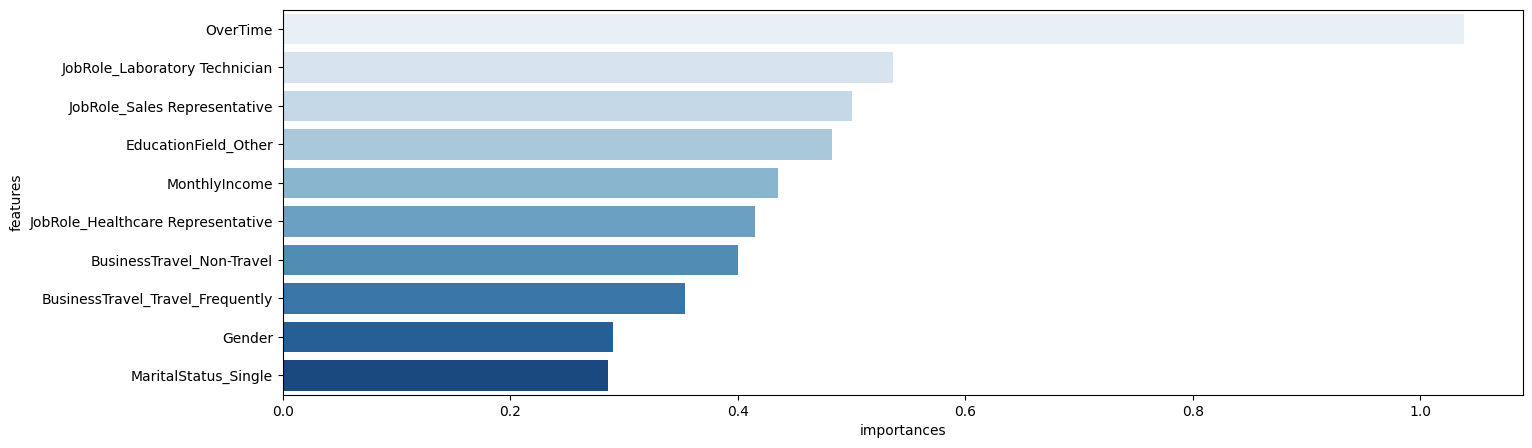

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(model_svc_under.coef_)[0]}).sort_values("Importancia", ascending=False).head(25))

importances = np.abs(model_svc_under.coef_)[0]
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
svc = SVC(random_state=42, kernel='linear') 
svc_param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'] }

grid_search = GridSearchCV(svc, svc_param_grid, cv=5)

grid_search.fit(X_overResampled, y_overResampled)

model_svc_over = grid_search.best_estimator_

print('Mejores hiperparámetros:', grid_search.best_params_)
print('Puntuación de validación cruzada:', grid_search.best_score_)

prd_svc_over = model_svc_over.predict(X_test)
print(grid_search.score(X_test,y_test))

##print(balanced_accuracy_score(y_test, prd_svc_over))
print(classification_report(y_test, prd_svc_over))

Mejores hiperparámetros: {'C': 10, 'gamma': 'scale'}
Puntuación de validación cruzada: 0.7900841740024417
0.782312925170068
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       247
           1       0.39      0.66      0.49        47

    accuracy                           0.78       294
   macro avg       0.66      0.73      0.68       294
weighted avg       0.84      0.78      0.80       294



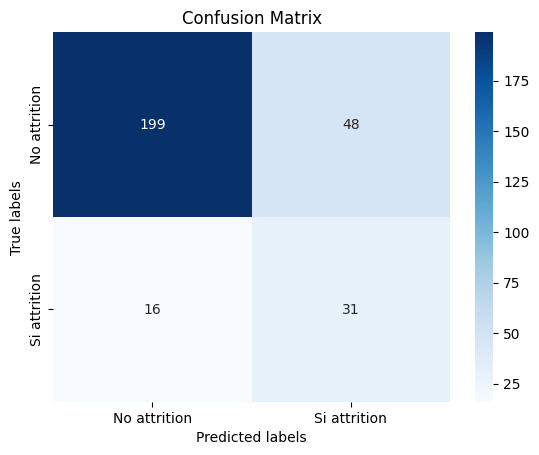

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_svc_over), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                             Variable  Importancia
34          JobRole_Research Director     2.663456
30            JobRole_Human Resources     2.177169
20         Department_Human Resources     1.492036
9                            OverTime     1.468324
31      JobRole_Laboratory Technician     1.298933
37       JobRole_Sales Representative     1.271513
23     EducationField_Human Resources     1.259663
22                   Department_Sales     0.987647
32                    JobRole_Manager     0.848031
17          BusinessTravel_Non-Travel     0.824564
18   BusinessTravel_Travel_Frequently     0.739830
29  JobRole_Healthcare Representative     0.717665
27               EducationField_Other     0.706303
33     JobRole_Manufacturing Director     0.702657
15                     YearsAtCompany     0.506378
21  Department_Research & Development     0.504389
16            YearsSinceLastPromotion     0.460153
0                                 Age     0.413357
4                              

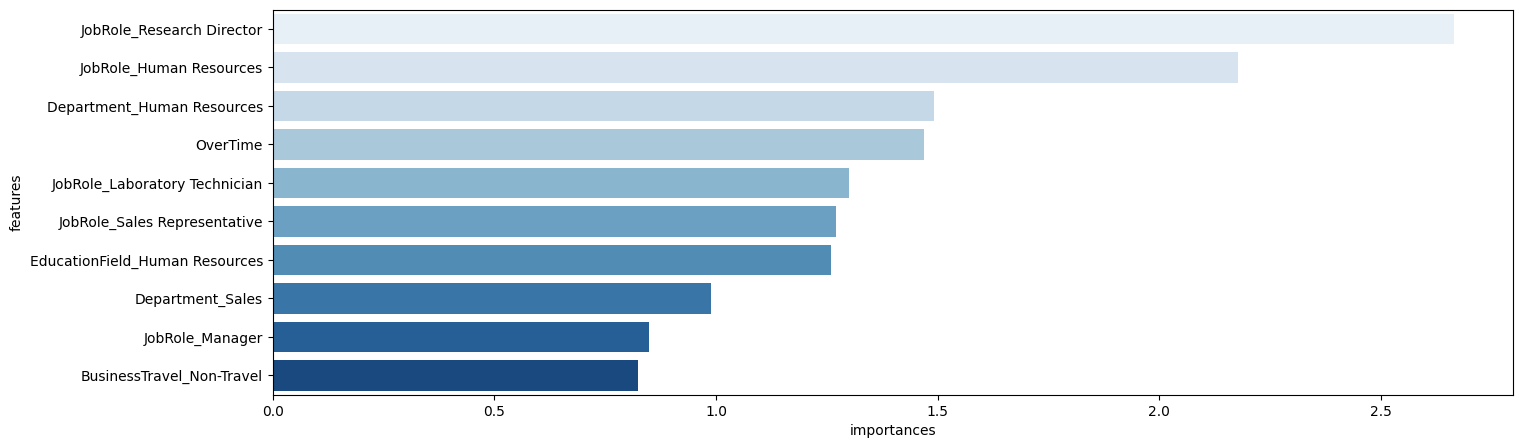

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(model_svc_over.coef_)[0]}).sort_values("Importancia", ascending=False).head(20))

importances = np.abs(model_svc_over.coef_)[0]
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

#Red Neuronal

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train,y_train)

prd_mlp_norm = mlp.predict(X_test)

#print(balanced_accuracy_score(y_test, prd_mlp_norm))

print(classification_report(y_test, prd_mlp_norm))


              precision    recall  f1-score   support

           0       0.89      0.94      0.92       247
           1       0.56      0.40      0.47        47

    accuracy                           0.85       294
   macro avg       0.73      0.67      0.69       294
weighted avg       0.84      0.85      0.84       294



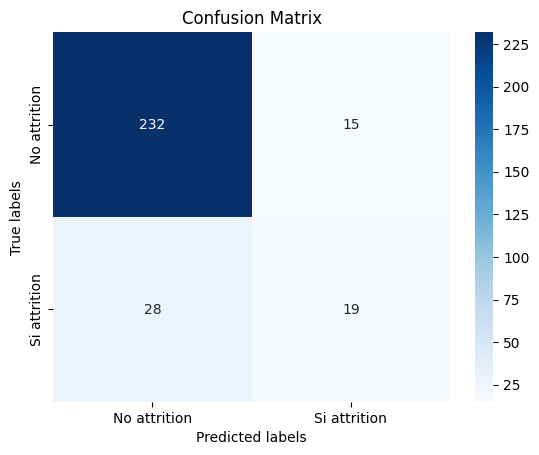

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_mlp_norm), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                             Variable  Importancia
27               EducationField_Other    23.605021
17          BusinessTravel_Non-Travel    23.164891
29  JobRole_Healthcare Representative    22.672387
34          JobRole_Research Director    22.212039
20         Department_Human Resources    21.137282


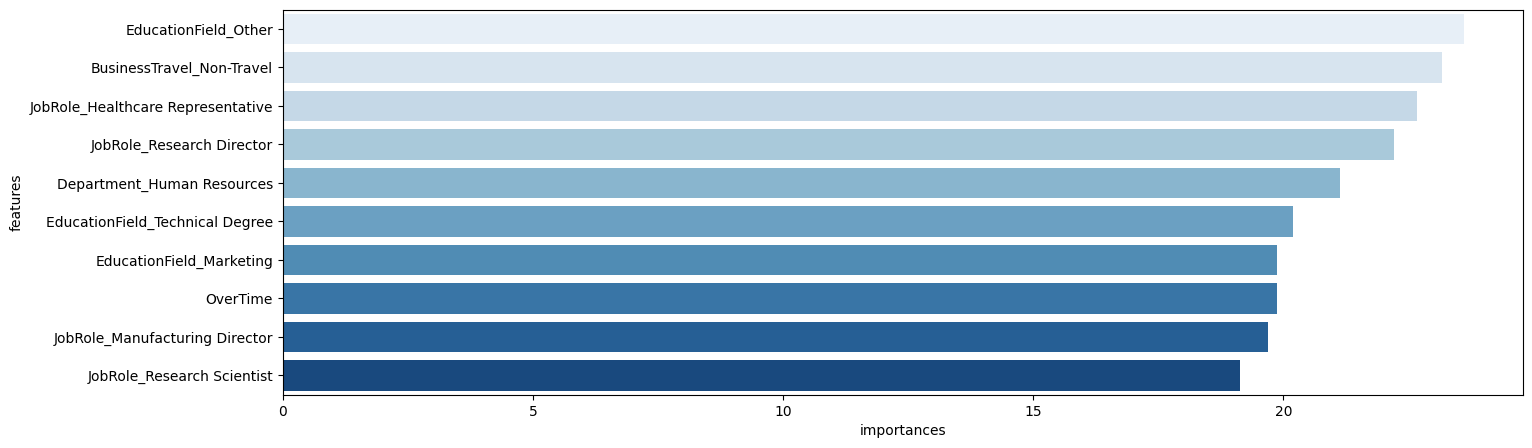

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(mlp.coefs_[0]).sum(axis=1)}).sort_values("Importancia", ascending=False).head())

importances = np.abs(mlp.coefs_[0]).sum(axis=1)
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_over = MLPClassifier()
mlp_over.fit(X_overResampled,y_overResampled)

predict_train = mlp_over.predict(X_overResampled)
prd_mlp_over = mlp_over.predict(X_test)

#print(balanced_accuracy_score(y_test, predict_test))

print(classification_report(y_test, prd_mlp_over))


              precision    recall  f1-score   support

           0       0.90      0.91      0.90       247
           1       0.49      0.45      0.47        47

    accuracy                           0.84       294
   macro avg       0.69      0.68      0.69       294
weighted avg       0.83      0.84      0.83       294



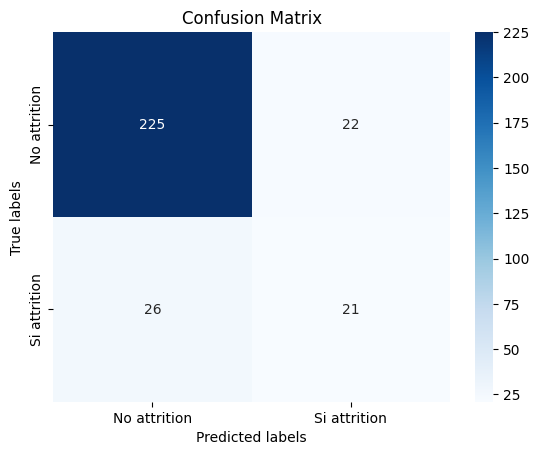

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_mlp_over), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                             Variable  Importancia
27               EducationField_Other    31.236539
29  JobRole_Healthcare Representative    29.133513
33     JobRole_Manufacturing Director    28.737155
17          BusinessTravel_Non-Travel    25.675504
25           EducationField_Marketing    25.466750


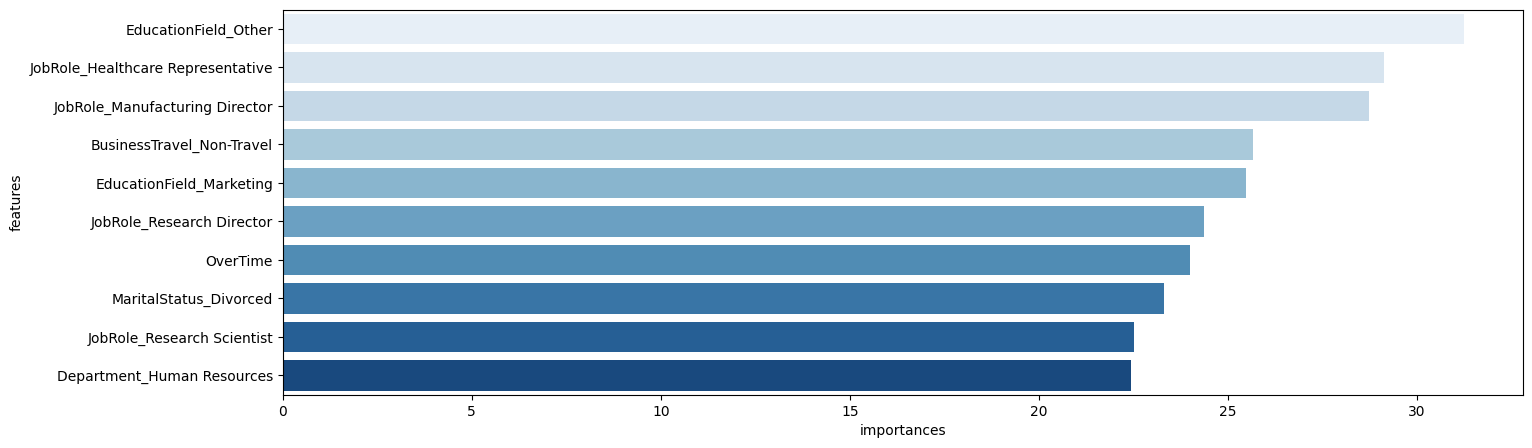

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(mlp_over.coefs_[0]).sum(axis=1)}).sort_values("Importancia", ascending=False).head())

importances = np.abs(mlp_over.coefs_[0]).sum(axis=1)
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')




In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_under = MLPClassifier()
mlp_under.fit(X_underResampled,y_underResampled)

predict_train = mlp_under.predict(X_underResampled)
prd_mlp_under = mlp_under.predict(X_test)

#print(balanced_accuracy_score(y_test, predict_test))

print(classification_report(y_test, prd_mlp_under))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.36      0.62      0.46        47

    accuracy                           0.77       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.77      0.79       294



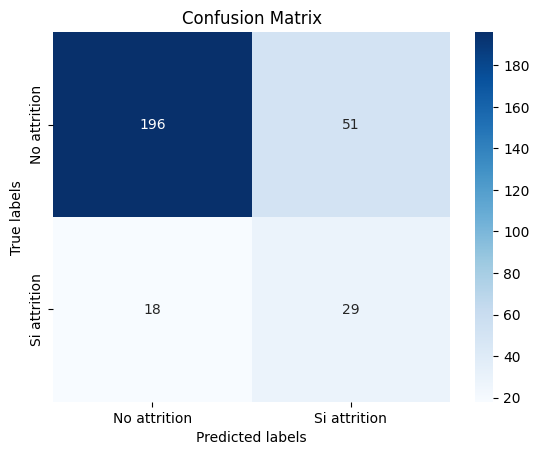

In [ ]:
ax= plt.subplot()

sns.heatmap(confusion_matrix(y_test,prd_mlp_under), annot=True, fmt='g', ax=ax,cmap=plt.cm.Blues);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["No attrition", "Si attrition"]); ax.yaxis.set_ticklabels(["No attrition", "Si attrition"]);

#sns.heatmap(confusion_matrix(y_test,prd_log), annot=True, fmt="d", xticklabels=["no", "sí"], yticklabels=["no", "sí"], cmap=plt.cm.Blues)
plt.show()
#plt.savefig('gráfica_Gender.pdf', dpi=fig.dpi)

                           Variable  Importancia
34        JobRole_Research Director    18.532198
33   JobRole_Manufacturing Director    18.478382
17        BusinessTravel_Non-Travel    17.565864
28  EducationField_Technical Degree    16.739380
15                   YearsAtCompany    16.220940


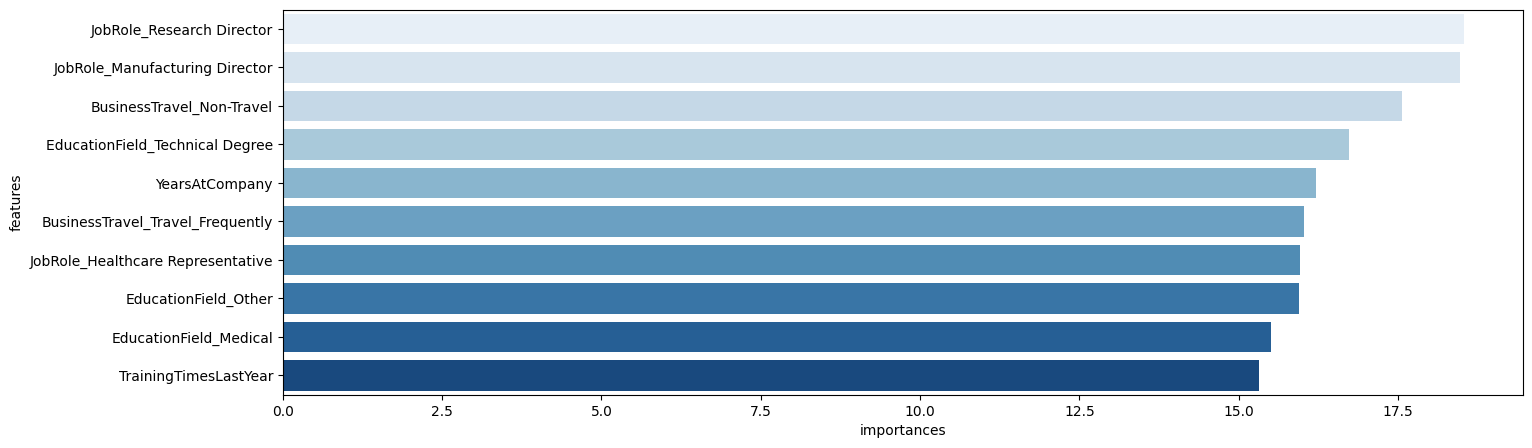

In [ ]:
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(mlp_under.coefs_[0]).sum(axis=1)}).sort_values("Importancia", ascending=False).head())

importances = np.abs(mlp_under.coefs_[0]).sum(axis=1)
features = X.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)[:10]
figure = plt.figure(figsize=(16,5))
#sns.barplot(x = data['importances'], y = data['features'], palette = 'Greens', orient = 'h').set_title(names[i]);
ax = sns.barplot(x = data['importances'], y = data['features'], palette = 'Blues', orient = 'h')

# Definimos los modelos y los parámetros a evaluar con GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)
dtc_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svc = SVC(random_state=42)
svc_param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

rfr = RandomForestRegressor(random_state=42)
rfr_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

mlp = MLPClassifier(random_state=42)
mlp_param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

xgb = XGBClassifier(random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1],
    'subsample': [0.5, 0.75, 1.

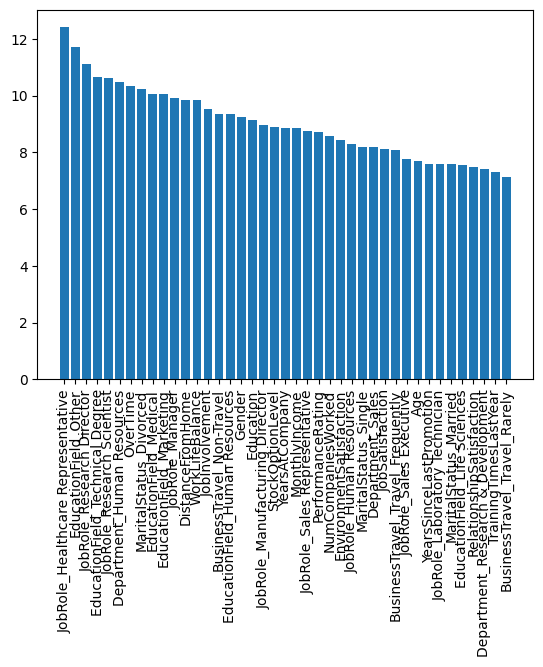

Red neuronal - Importancia de las variables:
                             Variable  Importancia
29  JobRole_Healthcare Representative    12.409987
27               EducationField_Other    11.702158
34          JobRole_Research Director    11.116838
28    EducationField_Technical Degree    10.660229
35         JobRole_Research Scientist    10.629553


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

coefs = np.abs(mlp.coefs_[0]).sum(axis=1)
indices = np.argsort(coefs)[::-1]
feature_names = X_train.columns
sorted_feature_names = feature_names[indices]
plt.bar(range(len(coefs)), coefs[indices])
plt.xticks(range(len(coefs)), sorted_feature_names, rotation=90)
plt.show()

print("Red neuronal - Importancia de las variables:")
print(pd.DataFrame({"Variable": X.columns, "Importancia": np.abs(mlp.coefs_[0]).sum(axis=1)}).sort_values("Importancia", ascending=False).head())

In [ ]:
# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, predict_test)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

NameError: ignored

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, predict_test)
pr_auc = auc(recall, precision)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8,8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Curva Precisión-Recall (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precisión')
plt.title('Curva Precisión-Recall')
plt.legend(loc="lower left")
plt.show()